<font color='green' size='10px'>**Armin Tourajmehr**</font>

<font color='black' size='10px'>**Project - Phase 2**</font>

<font color='black'>I chose <font color='blue'>**[heart disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download)**</font> dataset for this project. It is downloaded below.</font>

In [1]:
# Here we install packages that I need
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
data <- read.csv('heart.csv')

<font size='5px'>**Features in dataset are:**</font>

- age
- sex (1 = male; 0 = female)
- chest pain type (4 values) (cp)
- resting blood pressure (trestbps)
- serum cholestoral in mg/dl (chol)
- fasting blood sugar > 120 mg/dl (fbs)
- resting electrocardiographic results (values 0,1,2) (restecg)
- maximum heart rate achieved (thalach)
- exercise induced angina (exang)
- oldpeak = ST depression induced by exercise relative to rest (oldpeak)
- the slope of the peak exercise ST segment (slope)
- number of major vessels (0-3) colored by flourosopy (ca)
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (thal)
- Has heart disease = 1 or does not have = 0 (target)



In [ ]:
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


Handling missing values (I did in phase 01 and just copied here)

In [5]:
data <- data %>%
  filter(ca >= 0 & ca <= 3) %>%
  # Remove rows where 'thal' column has the value 0
  filter(thal >= 1 & thal <= 3)

<font color='red' size='10px'>**Question 1**</font>

**Consider two categorical variables in your dataset for which at least one of them has more than two levels. Using these, follow these steps:**





I choose two categorical variables **cp** and **sex**.

In [ ]:
cp <- as.factor(data$cp)
sex <- as.factor(data$sex)

<font color='orange' size='5px'>**A)**</font>

**Derive a 95% confidence interval for the difference of these two variables and interpret it.**

In [ ]:
# Making frequency table
contingency_table <- table(cp,sex)

In [ ]:
contingency_table

   sex
cp    0   1
  0 133 357
  1  57 106
  2 106 164
  3  13  64

In [ ]:
test <- chisq.test(contingency_table)
test


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 20.425, df = 3, p-value = 0.0001386


In [ ]:
# Extract counts of successes and trials for each level of 'sex'
# Here we compare 'sex' level 1 vs level 0 for a specific level of 'cp', e.g., cp = 1
successes <- c(contingency_table[2, 1], contingency_table[1, 1])
trials <- c(sum(contingency_table[2, ]), sum(contingency_table[1, ]))

# Perform proportion test and calculate confidence interval
prop_test_result <- prop.test(successes, trials, correct = FALSE)

# Print the confidence interval for the difference
print(prop_test_result$conf.int)

[1] -0.004860029  0.161389390
attr(,"conf.level")
[1] 0.95


- **The 95% confidence interval for the difference in the proportions of males and females with typical angina (cp = 0) is approximately (-0.0048, 0.161). This means that we are 95% confident that the true difference in proportions lies within this interval. Since the interval includes 0, we do not have enough evidence to conclude that there is a significant difference in the proportion of typical angina between males and females.**

<font color='orange' size='5px'>**B)**</font>

**By hypothesis testing, determine if the two variables are independent or not.**

In [ ]:
print(test)


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 20.425, df = 3, p-value = 0.0001386



In [ ]:
# Interpret the p-value
if (test$p.value < 0.05) {
  cat("The p-value is", test$p.value, "- Reject the null hypothesis. There is a significant association between sex and chest pain type (cp).\n")
} else {
  cat("The p-value is", test$p.value, "- Fail to reject the null hypothesis. There is no significant association between sex and chest pain type (cp).\n")
}

The p-value is 0.0001385681 - Reject the null hypothesis. There is a significant association between sex and chest pain type (cp).


**The data provides convincing evidence that age and goals are dependent.**

<font color='red' size='10px'>**Question 2**</font>

**Choose a binary categorical variable and randomly select a small sample of your data (small sample size, e.g., n ≤ 15). Then, perform a hypothesis test for the variable’s success rate by means of the Simulation method.**





In [ ]:
library(dplyr)

In [ ]:
# We choose "target" column as a binary categorical variable
# target (1 = Has heart disease ; 0 = does not have)

target <- data$target

In [ ]:
# Verify the levels of the binary variable
table(target)

target
  0   1 
492 508 

In [ ]:
# Set a seed for reproducibility
set.seed(123)

# Randomly select a small sample (n <= 15)
sample_size <- 15
small_sample <- sample(target, sample_size)

# Display the small sample
small_sample


[1] 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1

<font color='blue' size='5px'>**Hypothesis test:**</font>

- **Null Hypothesis ($H_0$):** The population proportion of success (e.g., target = 1) is $p_0$ (assume that $p_0 = 0.5$)

- **Alternative Hypothesis ($H_A$):** The population proportion is different from $p_0$.

Observed sample proportion: 0.6666667 
P-value: 0.1536 
Fail to reject the null hypothesis. There is no evidence that the population proportion is different from 0.5 


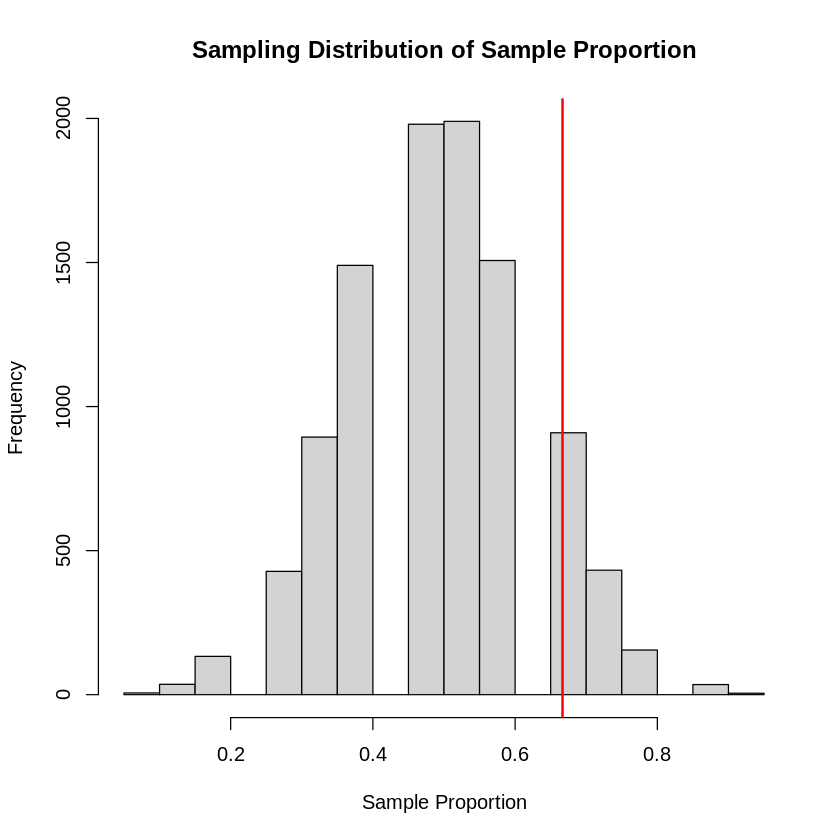

In [ ]:
# Define the hypothesized proportion
p0 <- 0.5

# Calculate the observed sample proportion
observed_proportion <- mean(small_sample)

# Number of simulations
num_simulations <- 10000

# Simulate the sampling distribution under the null hypothesis
simulated_proportions <- replicate(num_simulations, {
  simulated_sample <- sample(c(0, 1), sample_size, replace = TRUE, prob = c(1 - p0, p0))
  mean(simulated_sample)
})

# Calculate the p-value
p_value <- mean(simulated_proportions >= observed_proportion)

# Plot the sampling distribution
hist(simulated_proportions, breaks = 30, main = "Sampling Distribution of Sample Proportion", xlab = "Sample Proportion")
abline(v = observed_proportion, col = "red", lwd = 2)

# Print the results
cat("Observed sample proportion:", observed_proportion, "\n")
cat("P-value:", p_value, "\n")

# Interpret the results
if (p_value < 0.05) {
  cat("Reject the null hypothesis. There is evidence that the population proportion is different from", p0, "\n")
} else {
  cat("Fail to reject the null hypothesis. There is no evidence that the population proportion is different from", p0, "\n")
}


Based on what we got:
- **<font color='green'>Fail to reject</font> the null hypothesis. There is no evidence that the population proportion is different from 0.**

<font color='red' size='10px'>**Question 3**</font>

**Answer the following questions:**
> <font color='red' size='4px'>**Note:**</font>
-  **To answer the following questions, first implement them by yourself in R and then use R functions to solve them.)**





<font color='orange' size='5px'>**A)**</font>

**Choose a categorical variable that has more than two levels, calculate its probability distribution. Then choose two samples of size $100$ from your dataset. One of the samples should be randomly selected and the other should be biased on purpose. Compare each sample with the real distribution using $𝜒^2$ (goodness of fit) and interpret your results. (be sure to check the requirements for the test and write them down in your answer.)**

In [ ]:
cp <- data$cp

In [ ]:
# Calculate the probability distribution of "cp" colomn

cp_distribution <- table(cp) / nrow(data)
cp_distribution

cp
    0     1     2     3 
0.490 0.163 0.270 0.077 

In [ ]:
# Choose two samples of size 100 from the dataset

set.seed(123)

sample_random <- sample(cp, size=100 , replace=FALSE)
sample_random

[1] 2 2 0 2 2 2 0 1 0 1 2 0 2 0 1 0 0 0 0 0 3 2 2 2 2 2 1 0 0 1 0 0 0 2 0 0 3
 [38] 2 0 2 2 1 2 3 0 2 3 3 2 2 1 1 1 0 0 1 0 2 1 0 2 0 0 3 1 1 0 2 2 0 1 2 3 1
 [75] 0 3 0 3 0 0 2 0 0 2 1 0 2 2 1 0 2 2 0 3 3 0 0 0 0 0

In [ ]:
# Create a biase sample
sample_biased <- c(sample(cp[cp == 0], size = 65, replace = TRUE),
                    sample(cp[cp == 1], size = 30, replace = TRUE),
                    sample(cp[cp == 2], size = 10, replace = TRUE),
                    sample(cp[cp == 3], size = 5, replace = TRUE))
sample_biased

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3

In [ ]:
# Observed data
observed_random <- table(sample_random)
observed_biased <- table(sample_biased)

cat("Observed random data is:",observed_random,'\n')
cat("Observed biased data is:",observed_biased)

Observed random data is: 41 17 31 11 
Observed biased data is: 65 30 10 5

In [ ]:
observed_random

sample_random
 0  1  2  3 
41 17 31 11 

In [ ]:
observed_biased

sample_biased
 0  1  2  3 
65 30 10  5 

In [ ]:
# Expected data
expected <- table(cp) / nrow(data) * 100
expected


cp
   0    1    2    3 
49.0 16.3 27.0  7.7 

In [ ]:
# Calculate Chi-Square statistic manually for randomly selected sample
chi_sq_statistic <- sum((observed_random - expected)^2 / expected)
df <- length(observed_random) - 1
p_value <- 1 - pchisq(chi_sq_statistic, df)

# Print results
print(paste("Chi-Square Statistic:", chi_sq_statistic))
print(paste("Degrees of Freedom:", df))
print(paste("P-value:", p_value))

[1] "Chi-Square Statistic: 3.34306210555115"
[1] "Degrees of Freedom: 3"
[1] "P-value: 0.341694031143869"


In [ ]:
# Calculate Chi-Square statistic manually for biased sample
chi_sq_statistic <- sum((observed_biased - expected)^2 / expected)
df <- length(observed_biased) - 1
p_value <- 1 - pchisq(chi_sq_statistic, df)

# Print results
print(paste("Chi-Square Statistic:", chi_sq_statistic))
print(paste("Degrees of Freedom:", df))
print(paste("P-value:", p_value))

[1] "Chi-Square Statistic: 28.3896706727557"
[1] "Degrees of Freedom: 3"
[1] "P-value: 3.00844675160672e-06"


<font color='red'>**Conditions for the Chi-square Test:**</font>
- **Independence:** sampled observations must be independent.
  - Random sample/assignment (100 randomly sampled) <font color='green'>**✔**</font>
  - If sampling without replacement, 𝑛 < 10% of population (There are more than 1000 cases and 100 samples is less than 10% of dataset). <font color='green'>**✔**</font>
  - Each case only contributes to one cell in the table. <font color='green'>**✔**</font>

- **Sample size:**
  - Each particular scenario must have at least 5 expected cases. <font color='green'>**✔**</font>


**Using <font color='blue'>R</font> functions:**

In [ ]:
# Normalize the expected probabilities
expected <- expected / sum(expected)

# Chi-squared test for randomly selected sample
chisq_test_random <- chisq.test(observed_random, p = expected)
chisq_test_random

# Chi-squared test for biased sample
chisq_test_biased <- chisq.test(observed_biased, p = expected)
chisq_test_biased


	Chi-squared test for given probabilities

data:  observed_random
X-squared = 3.3431, df = 3, p-value = 0.3417



	Chi-squared test for given probabilities

data:  observed_biased
X-squared = 24.9, df = 3, p-value = 1.62e-05


- **Null Hypothesis ($H_0$) :** The observed frequencies in the sample(s) follow the real distribution.
- **Alternative Hypothesis ($H_A$) :** The observed frequencies do not follow the real distribution.

<font color='blue'>**Interpretation of the results:**</font>

- The null hypothesis of the chi-square test is that the observed frequencies in the samples follow the same distribution as the expected frequencies (real distribution).
If the p-value is less than the chosen significance level (commonly 0.05), then we reject the null hypothesis, indicating that there is a significant difference between the observed and expected frequencies, suggesting that the sample distribution do not match the real distribution. If the p-value is greater than the chosen significance level, then we fail to reject the null hypothesis, indicating that there is no significant difference between the observed and expected frequencies, suggesting that the sample distribution match the real distribution.


**As the characteristic value of p-value for <font color='blue'>observed random</font> is 0.3417, which is more than 0.05, as a result, we <font color='green'>fail to reject</font> null hypothesis, so the sample distribution matches the real distribution.**

**On the other hand, for <font color='blue'>observed biased</font>, the p-value is 1.62e-05, which is much smaller than 0.05. Therefore, we <font color='red'>reject</font> the null hypothesis, which means that the sample distribution does not match the real distribution.**

<font color='orange' size='5px'>**B)**</font>

**Pick up another categorical variable and compare it to the one you chose in part (a). Using the $𝜒^2$ test, check if the two variables are independent or not.**

In [ ]:
# Choose "slope" column
slope <- data$slope

In [ ]:
contingency_table <- table(cp, slope)
contingency_table

   slope
cp    0   1   2
  0  42 285 163
  1   8  37 118
  2  15 110 145
  3   9  39  29

In [ ]:
chisq_test_independence <- chisq.test(contingency_table)
chisq_test_independence


	Pearson's Chi-squared test

data:  contingency_table
X-squared = 88.356, df = 6, p-value < 2.2e-16


<font color='blue'>**Interpret the chi-squared test results:**</font>

- p-value (2.2e-16) is smaller than 0.05 that means the two variables are not independent. In other words **slope** and **cp** are depenent to each other.

<font color='red' size='10px'>**Question 4**</font>

**From your dataset choose a numerical variable that predicts its future value is meaningful within the context of your dataset. Next, choose two explanatory variables which you believe are the best predictors for your response variable:**





In [ ]:
# Choose maximum heart rate achieved

thalach <- data$thalach

We also choose two eplanatory variables:

- **Age:** age of patient
- **Trestbps:** resting blood pressure

<font color='orange' size='5px'>**A)**</font>

**Without building a model yet, which explanatory variable do you guess is the more significant predictor and why? (use your knowledge from phase 1)**

- I think that the age variable is the more significant predictor because increasing age has different effects on the maximum heart rate achieved, resting blood pressure and many other things that ultimately lead to whether a person has heart disease or not. Of course, according to the relevant knowledge in the first phase of the project, based on the correlation of the cp variable, it played a more important role, but age can also have a significant effect.

<font color='orange' size='5px'>**B)**</font>

**for each explanatory variable:**
- **Check the Linearity, Nearly Normal Residuals, and Constant Variability conditions in R.**
- **Compute the least squares regression.**
- **Write the predictive equation for the response variable and interpret its parameters.**
- **Draw a scatter plot of the relation between these two variables overlaid with this least-squares fit as a dashed line.**

<font color='blue' szie='5px'>**Age:**</font>

In [ ]:
# Fit a linear regression model for each explanatory variable
model_age <- lm(thalach ~ age, data = data)


<font color='blue' szie='5px'>**thalach:**</font>

In [ ]:
# Fit linear regression model
model_trestbps <- lm(thalach ~ trestbps, data = data)


<font color='green' size='5px'>**Check linearity:**</font>

`geom_smooth()` using formula = 'y ~ x'


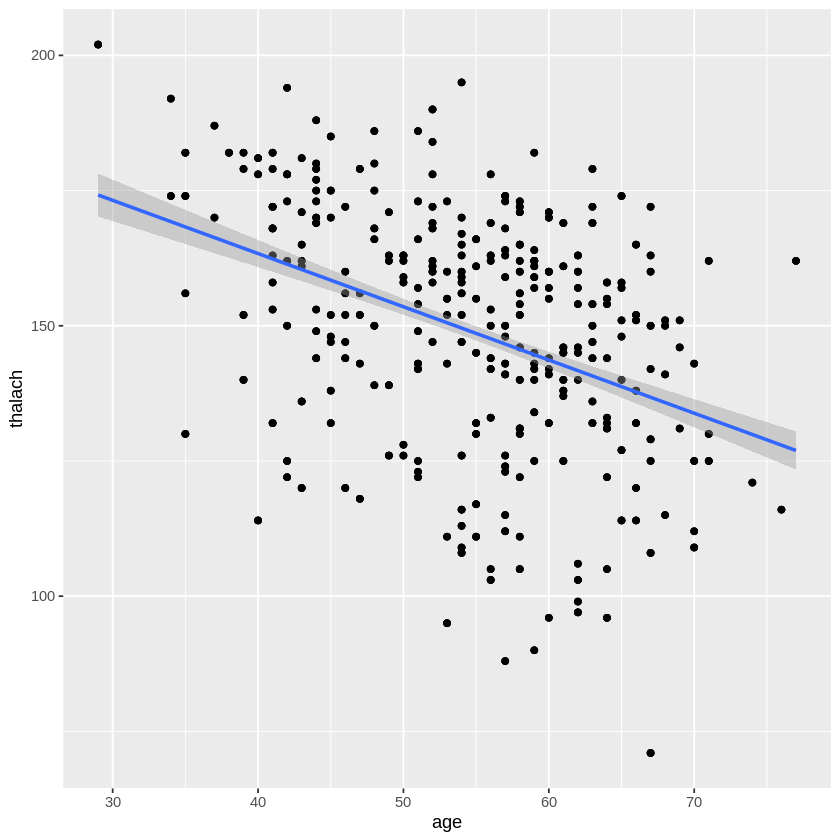

In [ ]:
# Check linearity by creating a scatterplot for age
ggplot(data, aes(x = age, y = thalach)) + geom_point() + geom_smooth(method = "lm")

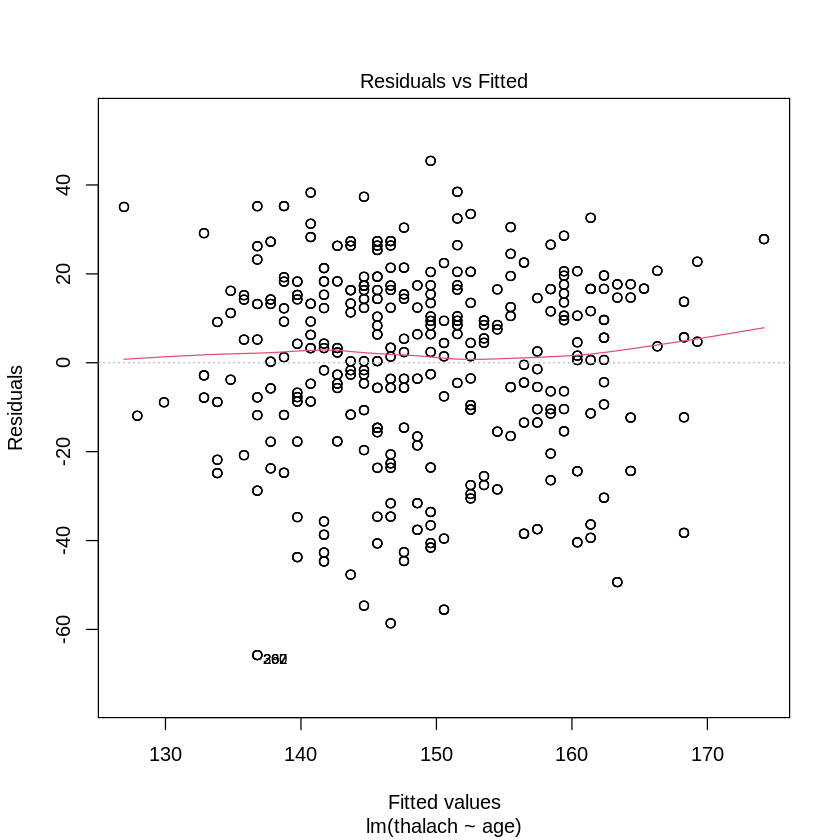

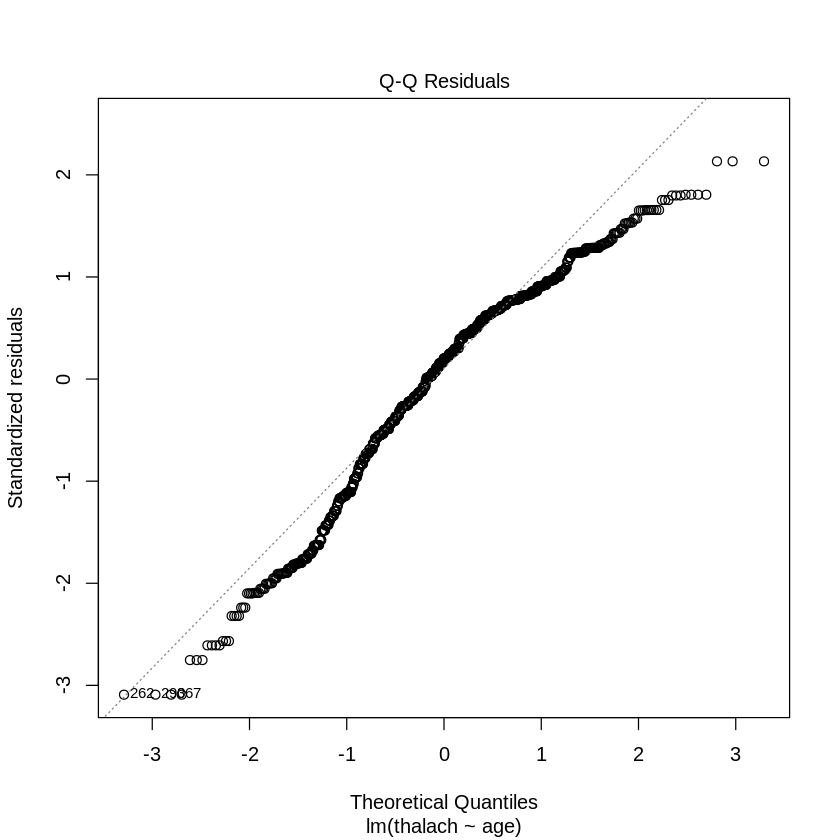

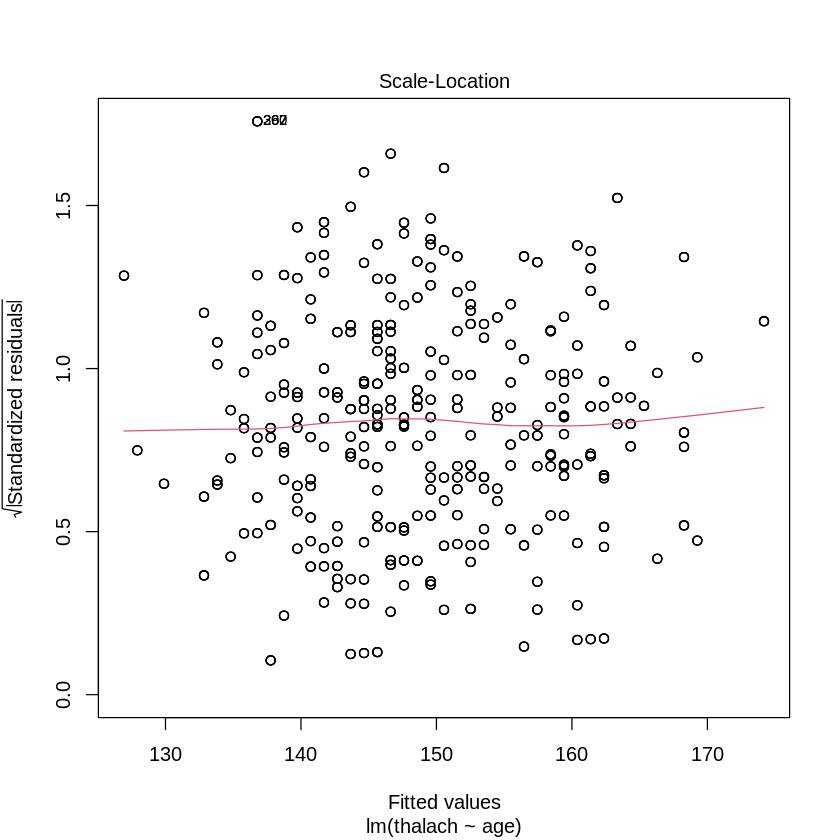

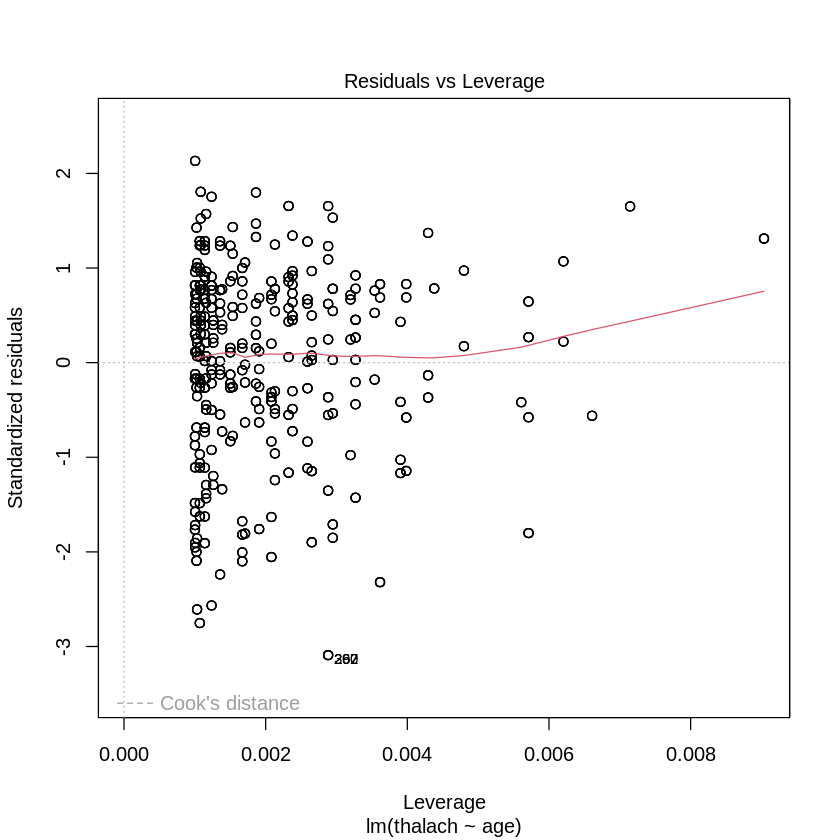

In [ ]:
# Create a plot of residuals vs. fitted values
plot(lm(thalach ~ age, data = data))

`geom_smooth()` using formula = 'y ~ x'


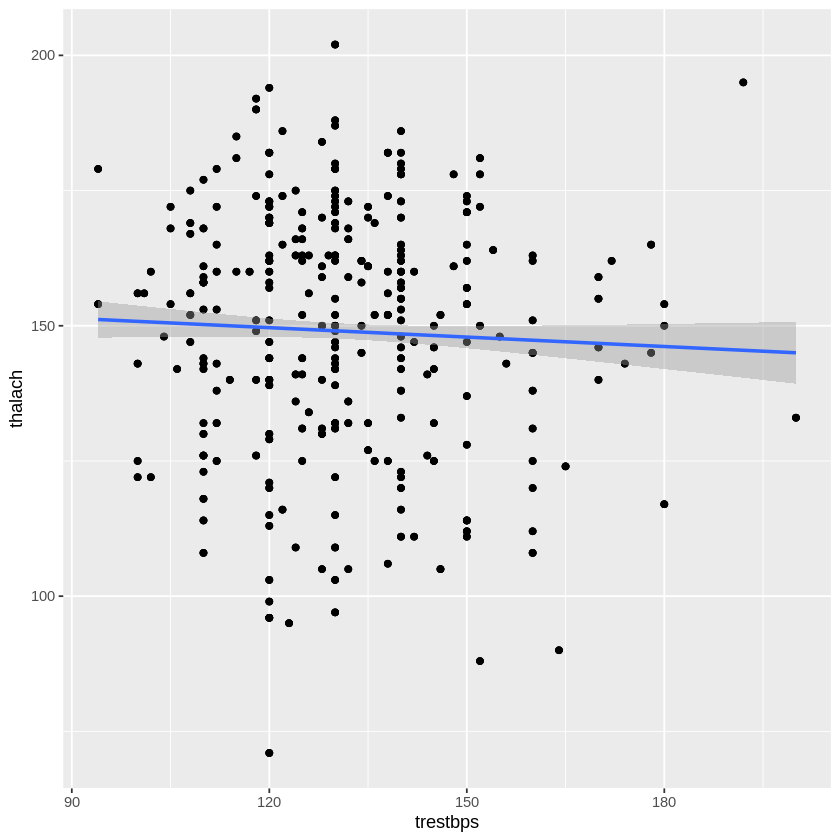

In [ ]:
# Check linearity by creating a scatterplot for trestbps
ggplot(data, aes(x = trestbps, y = thalach)) + geom_point() + geom_smooth(method = "lm")

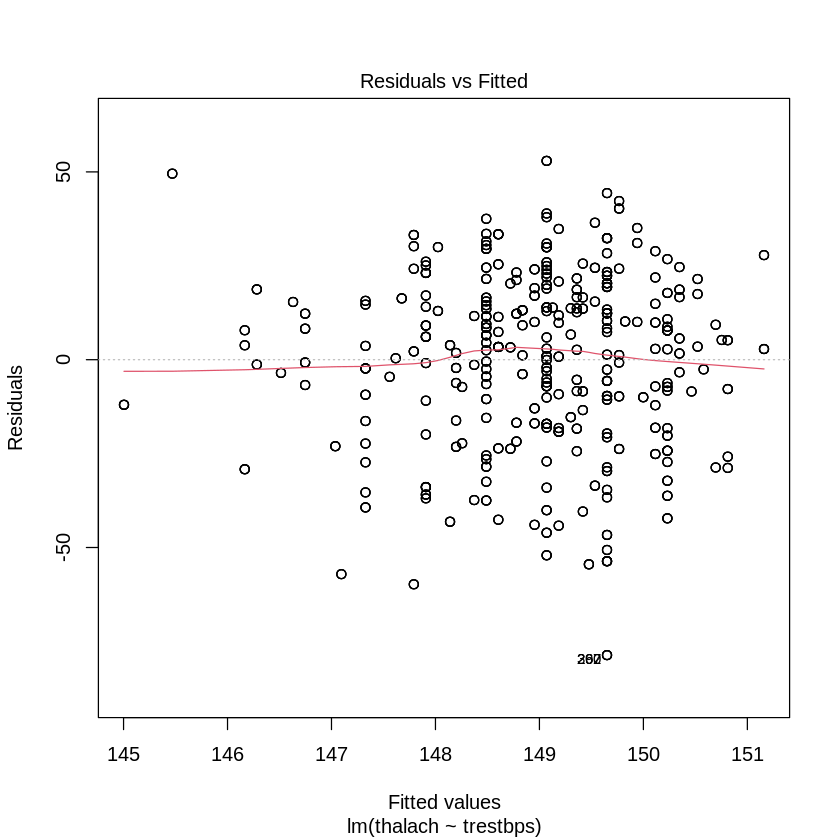

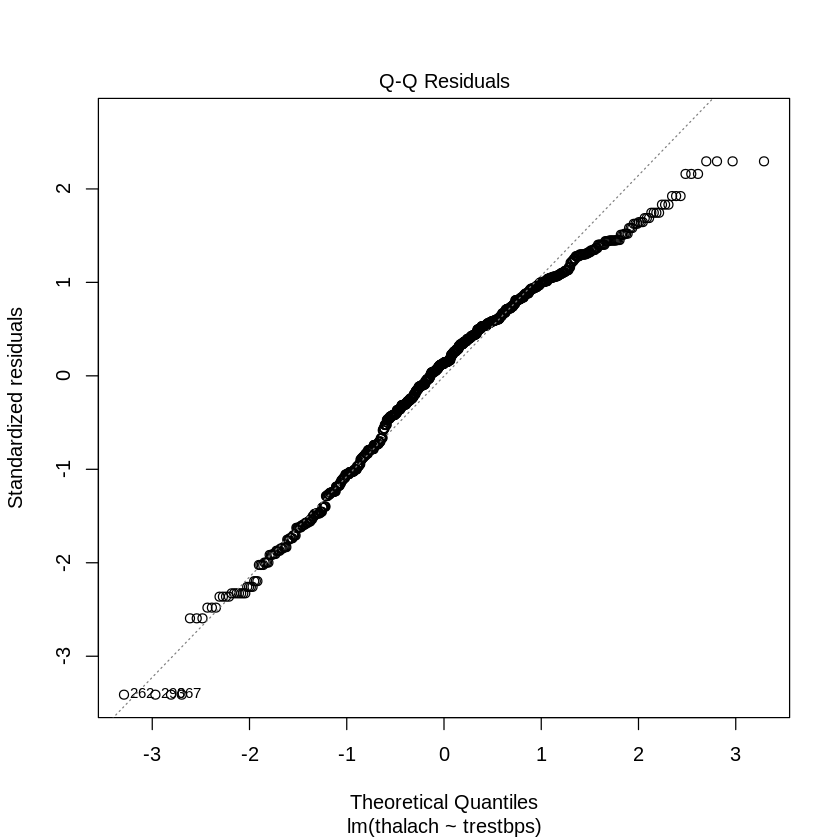

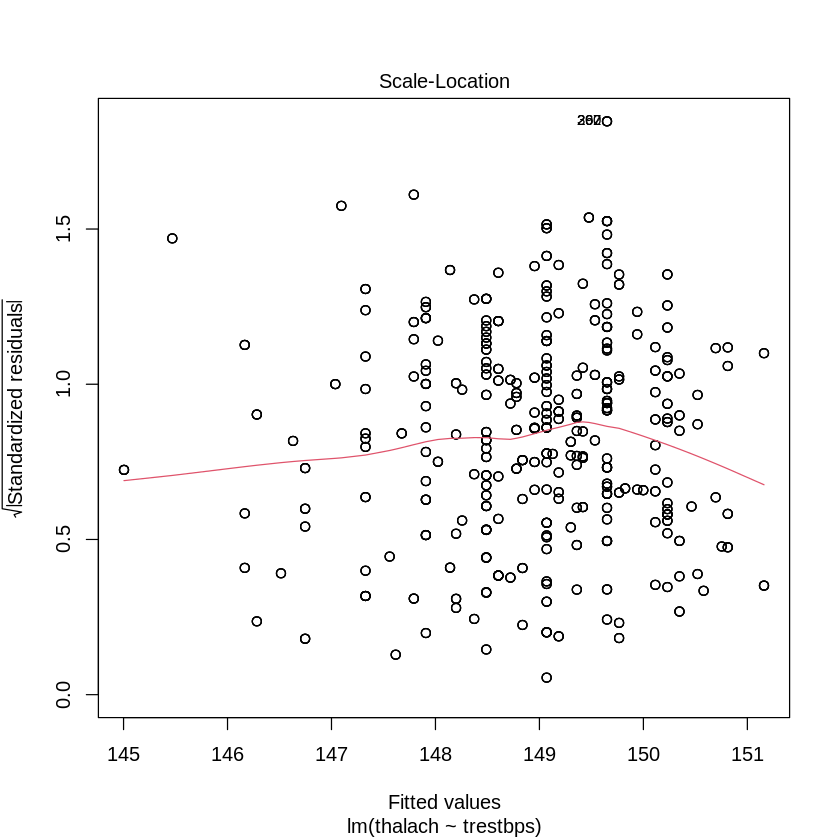

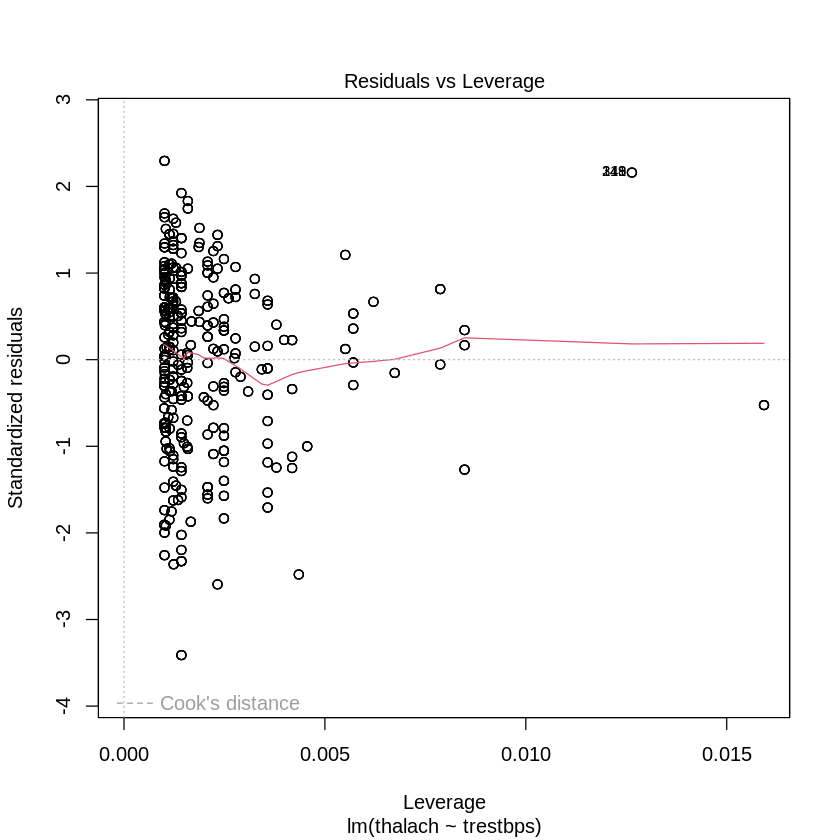

In [ ]:
plot(lm(thalach ~ trestbps, data = data))

**There is more linearity between age and thalach than between thalach and trestbps.**

<font color='green' size='5px'>**Normality of Residuals:**</font>

In [ ]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




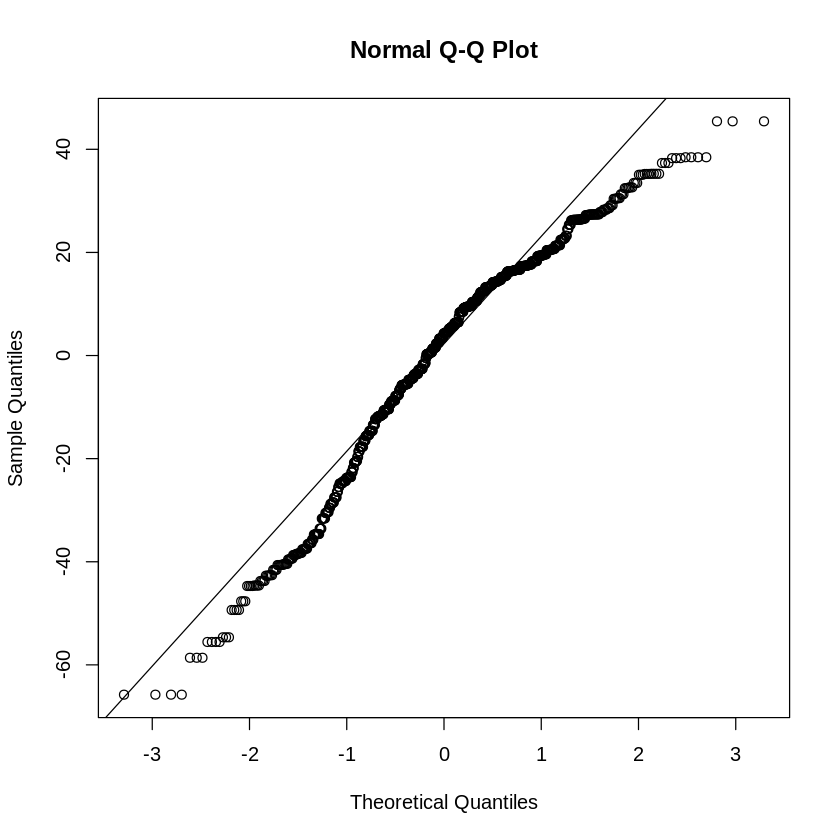

In [ ]:
# Create a Q-Q plot of residuals
qqnorm(resid(lm(thalach ~ age, data = data)))
qqline(resid(lm(thalach ~ age, data = data)))

[1] 262 290

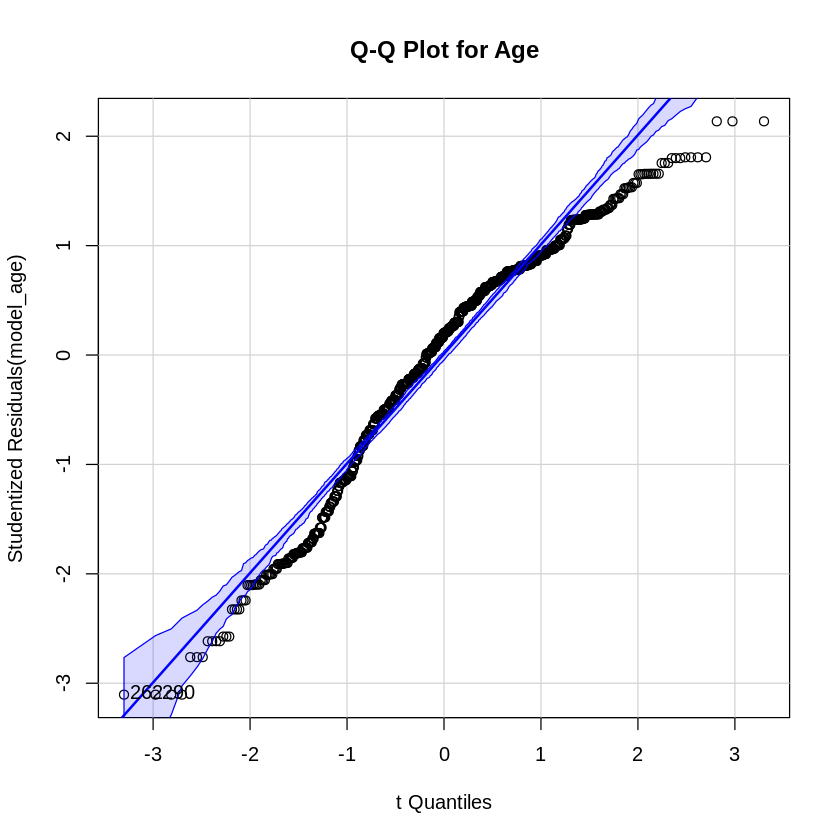

In [ ]:
# Q-Q plot for Age
qqPlot(model_age, main = "Q-Q Plot for Age")


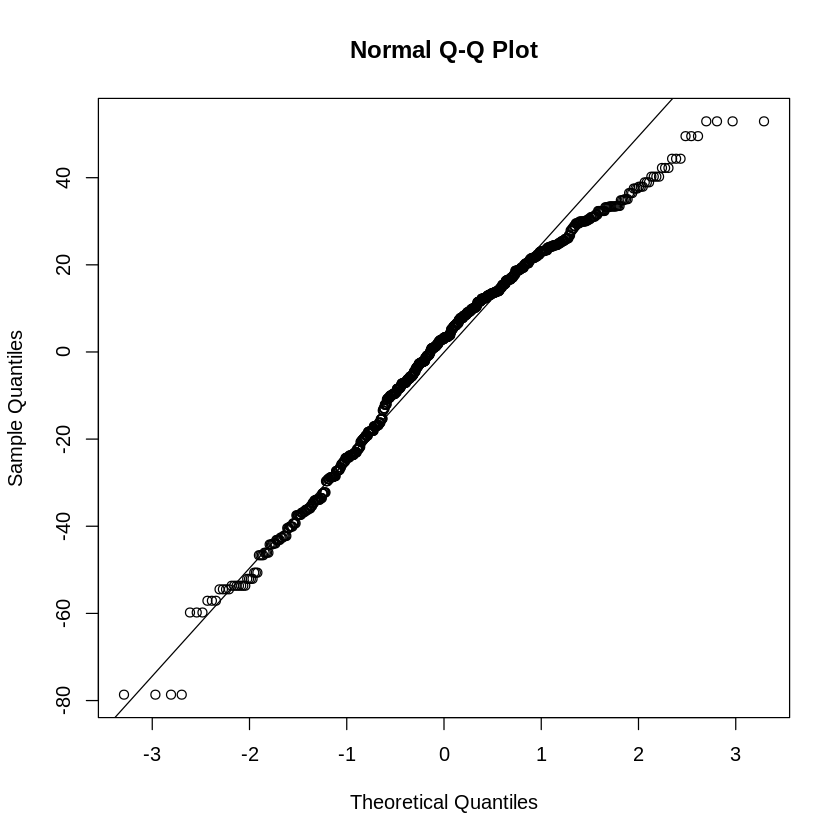

In [ ]:
# Create a Q-Q plot of residuals
qqnorm(resid(lm(thalach ~ trestbps, data = data)))
qqline(resid(lm(thalach ~ trestbps, data = data)))

[1] 262 290

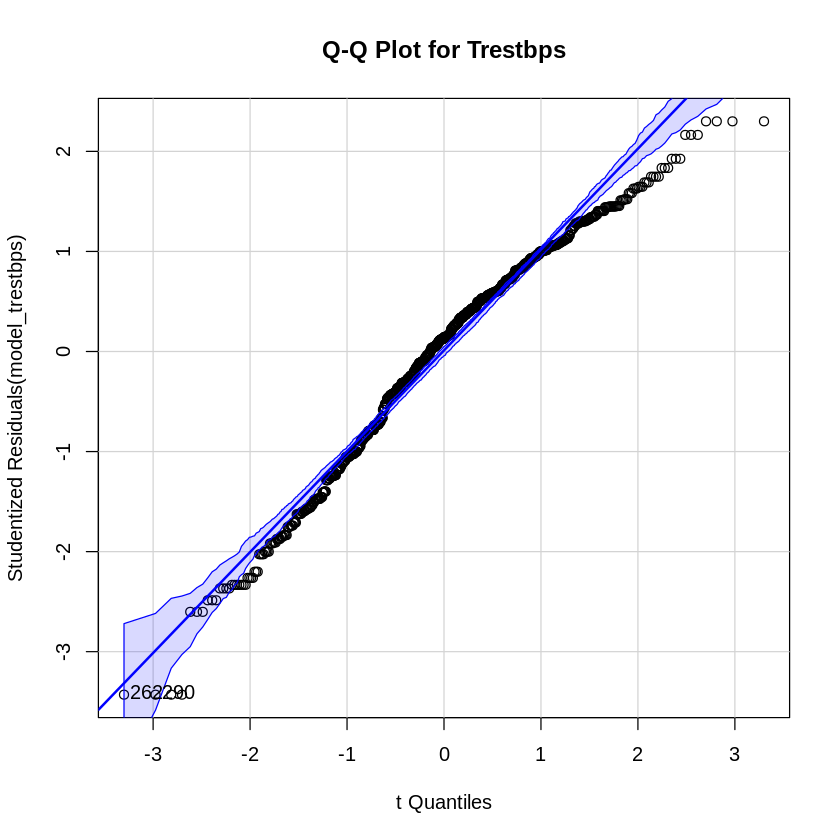

In [ ]:
# Q-Q plot for Trestbps
qqPlot(model_trestbps, main = "Q-Q Plot for Trestbps")


<font color='green' size='5px'>**Check Constant Variability:**</font>

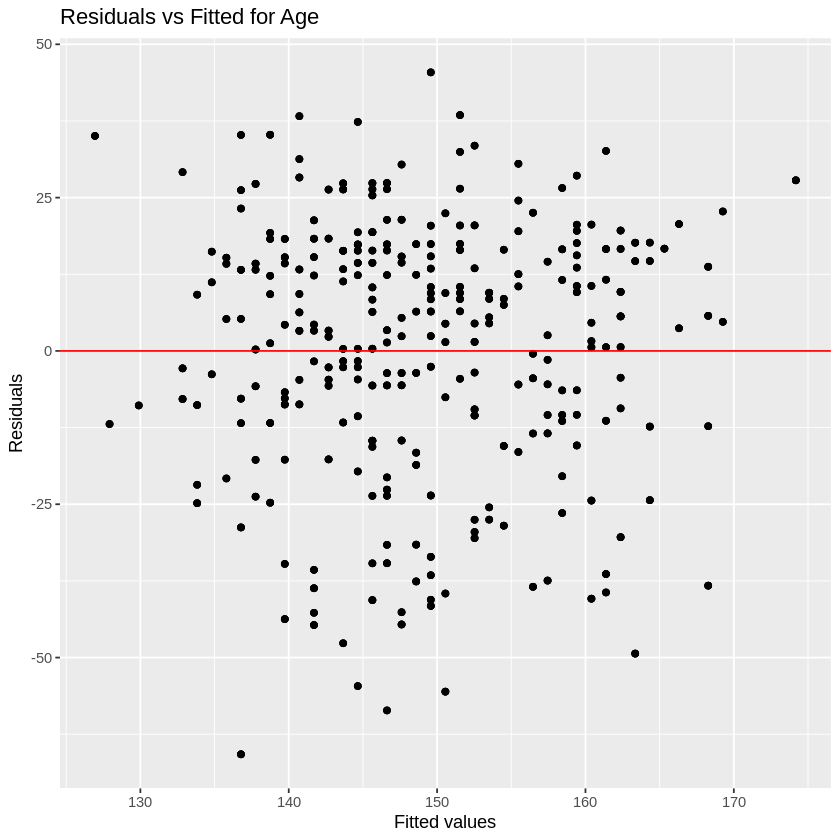

In [ ]:
# Residuals vs Fitted plot for Age (reused from Linearity check)
ggplot(data = data, aes(x = fitted(model_age), y = resid(model_age))) +
  geom_point() +
  geom_hline(yintercept = 0, col = "red") +
  labs(title = "Residuals vs Fitted for Age", x = "Fitted values", y = "Residuals")


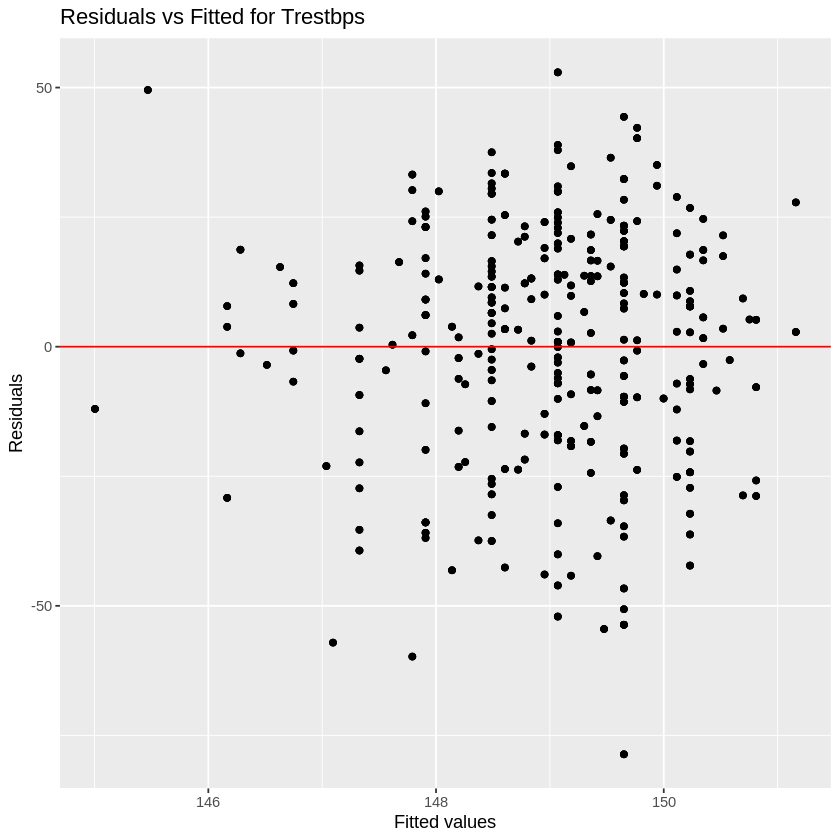

In [ ]:
# Residuals vs Fitted plot for Trestbps (reused from Linearity check)
ggplot(data = data, aes(x = fitted(model_trestbps), y = resid(model_trestbps))) +
  geom_point() +
  geom_hline(yintercept = 0, col = "red") +
  labs(title = "Residuals vs Fitted for Trestbps", x = "Fitted values", y = "Residuals")


<font color='blue'>**Compute the least squares regression.**</font>

In [ ]:
# Summary of the model
summary(model_age)


Call:
lm(formula = thalach ~ age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.780 -11.780   4.267  16.331  45.426 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 202.7191     4.1293   49.09   <2e-16 ***
age          -0.9842     0.0746  -13.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.31 on 998 degrees of freedom
Multiple R-squared:  0.1485,	Adjusted R-squared:  0.1476 
F-statistic:   174 on 1 and 998 DF,  p-value: < 2.2e-16


In [ ]:
# Summary of the model
summary(model_trestbps)


Call:
lm(formula = thalach ~ trestbps, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.650 -16.779   3.279  16.640  52.931 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 156.61913    5.47140  28.625   <2e-16 ***
trestbps     -0.05807    0.04121  -1.409    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.07 on 998 degrees of freedom
Multiple R-squared:  0.001986,	Adjusted R-squared:  0.0009862 
F-statistic: 1.986 on 1 and 998 DF,  p-value: 0.159


<font color='blue'>**Write the predictive equation for the response variable and interpret its parameters.**</font>

**We have two formulas:**

- First model:
  - $thalach = β_0 + β_1.age$
- Second model:
  - $thalach = β_0 + β_1.trestbps$

Where $β_0$ is the intercept of the regression line and $β_1$ is the slope of the regression line.

**Age:**
- $β_0$ is the estimated value of thalach when age is **zero**.
- $β_1$ is the changing in thalach for a one-unit **increase** in age.

**Trestbps:**
- $β_0$ is the estimated value of thalach when trestbps is **zero**.
- $β_1$ is the changing in thalach for a one-unit **increase** in trestbps.



<font color='blue'>**Draw a scatter plot of the relation between these two variables overlaid with this least-squares fit as a dashed line.**</font>

`geom_smooth()` using formula = 'y ~ x'


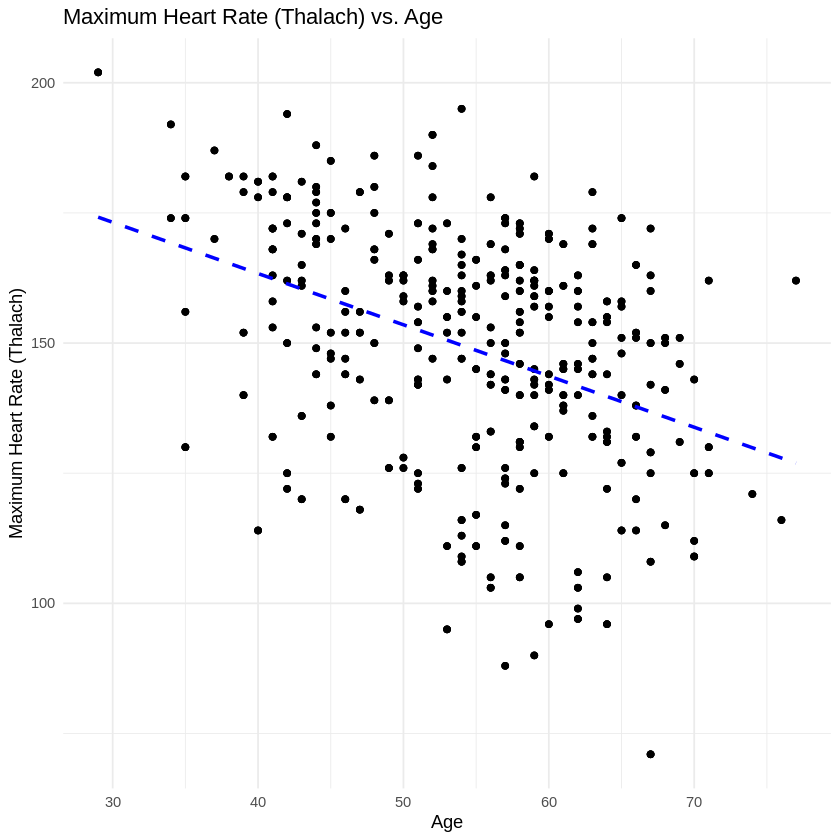

In [ ]:
# Scatter plot with regression line for Age vs. Thalach
ggplot(data = data, aes(x = age, y = thalach)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", color = "blue") +
  labs(title = "Maximum Heart Rate (Thalach) vs. Age",
       x = "Age",
       y = "Maximum Heart Rate (Thalach)") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


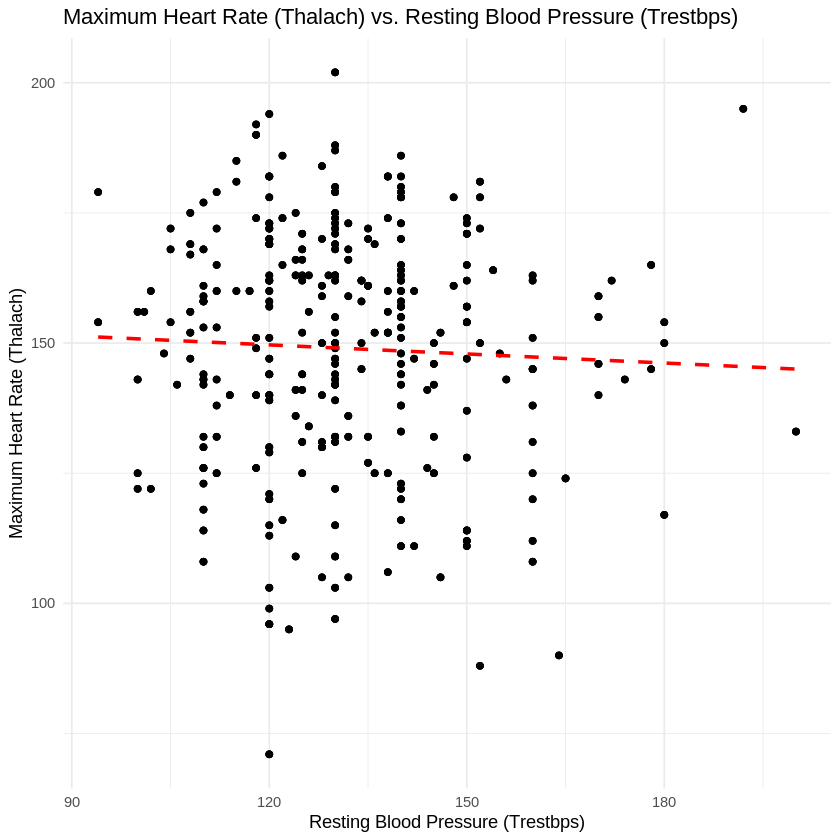

In [ ]:
# Scatter plot with regression line for Trestbps vs. Thalach
ggplot(data = data, aes(x = trestbps, y = thalach)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", color = "red") +
  labs(title = "Maximum Heart Rate (Thalach) vs. Resting Blood Pressure (Trestbps)",
       x = "Resting Blood Pressure (Trestbps)",
       y = "Maximum Heart Rate (Thalach)") +
  theme_minimal()


**According to the scatter diagram, there is a negative linear relationship between age and thalach, which means that thalach or the maximum heart rate achieved decreases with increasing age.**

<font color='orange' size='5px'>**C)**</font>

**By using the previous part results, try to explain which explanatory variable is the more significant predictor.**


- Looking at the regression coefficients, we see that the slope for age is larger in magnitude (-0.9842) compared to the slope for resting blood pressure (-0.05807).
- This indicates that **age** has a more significant effect on the maximum heart rate achieved (thalach) compared to resting blood pressure.

Therefore, based on the regression analysis, we can conclude that **age** is the more significant predictor of maximum heart rate achieved (thalach) compared to resting blood pressure.

<font color='orange' size='5px'>**D)**</font>

**Now, Compare your models, once using adjusted R2 and another time by ANOVA table. Explain results.**


In [ ]:
# Summary of the models
summary(model_age)
summary(model_trestbps)


Call:
lm(formula = thalach ~ age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.780 -11.780   4.267  16.331  45.426 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 202.7191     4.1293   49.09   <2e-16 ***
age          -0.9842     0.0746  -13.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.31 on 998 degrees of freedom
Multiple R-squared:  0.1485,	Adjusted R-squared:  0.1476 
F-statistic:   174 on 1 and 998 DF,  p-value: < 2.2e-16



Call:
lm(formula = thalach ~ trestbps, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.650 -16.779   3.279  16.640  52.931 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 156.61913    5.47140  28.625   <2e-16 ***
trestbps     -0.05807    0.04121  -1.409    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.07 on 998 degrees of freedom
Multiple R-squared:  0.001986,	Adjusted R-squared:  0.0009862 
F-statistic: 1.986 on 1 and 998 DF,  p-value: 0.159


In [ ]:
# Extract Adjusted R-squared values
adj_r2_age <- summary(model_age)$adj.r.squared
adj_r2_trestbps <- summary(model_trestbps)$adj.r.squared

# Print Adjusted R-squared values
cat("Adjusted R-squared for Age model:", adj_r2_age, "\n")
cat("Adjusted R-squared for Trestbps model:", adj_r2_trestbps, "\n")

Adjusted R-squared for Age model: 0.1476274 
Adjusted R-squared for Trestbps model: 0.0009862171 


The adjusted $R^2$ value indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
A higher adjusted $R^2$ value suggests a better fit of the model to the data.

**Based on the adjusted $R^2$ values, the model with age as the explanatory variable is a better fit for predicting thalach. The adjusted $R^2$ value is much higher for the model with age compared to the model with resting blood pressure.**

In [ ]:
# Perform ANOVA to compare the two models
anova_model_age <- anova(model_age)
anova_model_trestbps <- anova(model_trestbps)

# Print ANOVA tables
print(anova_model_age)
print(anova_model_trestbps)


Analysis of Variance Table

Response: thalach
           Df Sum Sq Mean Sq F value    Pr(>F)    
age         1  79036   79036  174.02 < 2.2e-16 ***
Residuals 998 453262     454                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: thalach
           Df Sum Sq Mean Sq F value Pr(>F)
trestbps    1   1057 1057.27  1.9862  0.159
Residuals 998 531241  532.31               


In [ ]:
# Perform ANOVA comparison of the two models
anova_comparison <- anova(model_age, model_trestbps)

# Print the ANOVA comparison
print(anova_comparison)


Analysis of Variance Table

Model 1: thalach ~ age
Model 2: thalach ~ trestbps
  Res.Df    RSS Df Sum of Sq F Pr(>F)
1    998 453262                      
2    998 531241  0    -77979         


The ANOVA table provides the analysis of variance for the regression models.
It includes the sum of squares, degrees of freedom, mean squares, F-statistic, and p-value.
The F-statistic tests the overall significance of the model.

**For age:**
- The p-value for the F-statistic is very small (close to zero), indicating that the model is statistically significant.

**For resting blood pressure:**
- The p-value for the F-statistic is relatively high, indicating that the model is not statistically significant.

Both adjusted $R^2$ and the ANOVA table suggest that the model with age as the explanatory variable is a better predictor of thalach compared to the model with resting blood pressure. The adjusted $R^2$ value is higher and the model is statistically significant for age. Therefore, age is the more significant predictor for thalach in this context.

<font color='orange' size='5px'>**E)**</font>

**According to the results that you found in the previous parts, list the features of a good predictor.**


<font color='green'>**High Adjusted $R^2$ Value:**</font>
- A good predictor should have a high adjusted $R^2$ value, indicating that a large proportion of the variance in the response variable is explained by the predictor variables.

<font color='green'>**Statistical Significance:**</font>

- A good predictor should have a statistically significant relationship with the response variable.
- The p-value associated with the F-statistic in the ANOVA table should be small (typically less than 0.05), indicating that the model is statistically significant.

<font color='green'>**Linearity:**</font>

- A good predictor should exhibit a linear relationship with the response variable.
- The scatter plot of the predictor variable against the response variable should not show any obvious deviations from a straight line.

<font color='green'>**Nearly Normal Residuals:**</font>

- The residuals (the differences between the observed and predicted values) should be approximately normally distributed.

<font color='green'>**Constant Variability:**</font>

- A good predictor should exhibit consistent variability across the range of the predictor variable.

<font color='orange' size='5px'>**F)**</font>

**Choose a random sample of 100 data points from the dataset.**


In [ ]:
library(dplyr)  # For data manipulation
library(stats)  # For linear regression and ANOVA

<font color='blue'>**By 90 percent of data, Build two Linear Regression models and design hypothesis tests to see if these explanatory variables are a significant predictor of the response variable or not.**</font>

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Randomly sample 100 data points
sampled_data <- data[sample(nrow(data), 100), ]

# Fit linear regression models on the sampled data
model_age <- lm(thalach ~ age, data = sampled_data)
model_trestbps <- lm(thalach ~ trestbps, data = sampled_data)

# Summary of the models
summary(model_age)

# Perform ANOVA to compare the two models
anova_results <- anova(model_age, model_trestbps)
print(anova_results)




Call:
lm(formula = thalach ~ age, data = sampled_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.859 -10.874   5.405  14.950  33.318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 214.7448    12.7116  16.894  < 2e-16 ***
age          -1.1177     0.2307  -4.845 4.74e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.22 on 98 degrees of freedom
Multiple R-squared:  0.1932,	Adjusted R-squared:  0.185 
F-statistic: 23.47 on 1 and 98 DF,  p-value: 4.741e-06


Analysis of Variance Table

Model 1: thalach ~ age
Model 2: thalach ~ trestbps
  Res.Df   RSS Df Sum of Sq F Pr(>F)
1     98 44112                      
2     98 54676  0    -10564         


In [ ]:
# Hypothesis testing for Model 1: thalach ~ age
p_value_age <- summary(model_age)$coef["age", "Pr(>|t|)"]
cat("P-value for age in Model 1:", p_value_age, "\n")
if (p_value_age < 0.1) {
  cat("Age is a significant predictor of thalach at 90% confidence level.\n")
} else {
  cat("Age is not a significant predictor of thalach at 90% confidence level.\n")
}


P-value for age in Model 1: 4.74091e-06 
Age is a significant predictor of thalach at 90% confidence level.


- **Null hypothesis ($H_0$):** The coefficient of age is not significantly different from zero
- **Alternative hypothesis ($H_A$):** The coefficient of age is significantly different from zero

Based on p-value (less than 0.05), We <font color='red'>reject</font> null hypothesis.

In [ ]:
summary(model_trestbps)


Call:
lm(formula = thalach ~ trestbps, data = sampled_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.939 -10.906   4.655  15.885  47.967 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 152.80834   20.16688   7.577    2e-11 ***
trestbps      0.00942    0.15571   0.060    0.952    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.62 on 98 degrees of freedom
Multiple R-squared:  3.735e-05,	Adjusted R-squared:  -0.01017 
F-statistic: 0.00366 on 1 and 98 DF,  p-value: 0.9519


In [ ]:
# Hypothesis testing for Model 2: thalach ~ trestbps
p_value_trestbps <- summary(model_trestbps)$coef["trestbps", "Pr(>|t|)"]
cat("P-value for trestbps in Model 2:", p_value_trestbps, "\n")
if (p_value_trestbps < 0.1) {
  cat("Trestbps is a significant predictor of thalach at 90% confidence level.\n")
} else {
  cat("Trestbps is not a significant predictor of thalach at 90% confidence level.\n")
}

P-value for trestbps in Model 2: 0.9518823 
Trestbps is not a significant predictor of thalach at 90% confidence level.


- **Null hypothesis ($H_0$):** The coefficient of trestbps is not significantly different from zero
- **Alternative hypothesis ($H_A$):** The coefficient of trestbps is significantly different from zero

Based on p-value (less than 0.05), We <font color='red'>fail to reject</font> null hypothesis.

<font color='blue'>**Calculate the 95% confidence interval for the slope of the relationship between response variable and explanatory variables. Interpret these CIs.**</font>

In [ ]:
# Calculate 95% confidence intervals for the slopes (coefficients)
conf_interval_age <- confint(model_age, level = 0.95)
conf_interval_trestbps <- confint(model_trestbps, level = 0.95)

# Print confidence intervals
cat("95% Confidence Interval for Age:\n")
print(conf_interval_age)

cat("\n95% Confidence Interval for Trestbps:\n")
print(conf_interval_trestbps)

95% Confidence Interval for Age:
                 2.5 %      97.5 %
(Intercept) 189.519032 239.9706409
age          -1.575498  -0.6599091

95% Confidence Interval for Trestbps:
                  2.5 %      97.5 %
(Intercept) 112.7878182 192.8288698
trestbps     -0.2995912   0.3184321


**Age Model:**

- The 95% confidence interval for the slope of age provides a range of values within which the true effect of age on maximum heart rate lies.


**Trestbps Model:**

- The 95% confidence interval for the slope of sex provides a range of values within which the true effect of sex on maximum heart rate lies.


<font color='blue'>**Use your models to predict the values of the response variable for the remaining percent of samples.**</font>

In [ ]:
# Set seed for reproducibility (if needed)
set.seed(123)

# Randomly sample 10% of data points that were not used in training
remaining_data <- anti_join(data, sampled_data, by = NULL)

# Predict values using Model 1 (thalach ~ age)
predictions_age <- predict(model_age, newdata = remaining_data)

# Predict values using Model 2 (thalach ~ trestbps)
predictions_trestbps <- predict(model_trestbps, newdata = remaining_data)

# Combine predictions with the original dataset
predicted_data <- remaining_data %>%
  mutate(predicted_thalach_age = predictions_age,
         predicted_thalach_trestbps = predictions_trestbps)

# View the predicted values alongside actual data
head(predicted_data[, c("age", "trestbps", "thalach", "predicted_thalach_age", "predicted_thalach_trestbps")], 10)

Joining with `by = join_by(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
exang, oldpeak, slope, ca, thal, target)`


,age,trestbps,thalach,predicted_thalach_age,predicted_thalach_trestbps
,<int>,<int>,<int>,<dbl>,<dbl>
1,53,140,155,155.5065,154.1272
2,70,145,125,136.5056,154.1743
3,61,148,161,146.5649,154.2026
4,58,100,122,149.9180,153.7504
5,58,114,140,149.9180,153.8823
6,55,160,145,153.2711,154.3156
7,46,120,144,163.3305,153.9388
8,54,122,116,154.3888,153.9576
9,71,112,125,135.3879,153.8634


<font color='blue'>**Compare the predicted values with actuals. Report success rate.**</font>

In [ ]:
# Load required library
library(stats)  # For linear regression and statistical functions

# Calculate predicted values for Model 1 (thalach ~ age)
predicted_thalach_age <- predict(model_age, newdata = remaining_data)

# Calculate predicted values for Model 2 (thalach ~ trestbps)
predicted_thalach_trestbps <- predict(model_trestbps, newdata = remaining_data)

# Calculate Mean Absolute Error (MAE) for Model 1
MAE_age <- mean(abs(predicted_thalach_age - remaining_data$thalach))

# Calculate Mean Absolute Error (MAE) for Model 2
MAE_trestbps <- mean(abs(predicted_thalach_trestbps - remaining_data$thalach))

# Calculate Root Mean Squared Error (RMSE) for Model 1
RMSE_age <- sqrt(mean((predicted_thalach_age - remaining_data$thalach)^2))

# Calculate Root Mean Squared Error (RMSE) for Model 2
RMSE_trestbps <- sqrt(mean((predicted_thalach_trestbps - remaining_data$thalach)^2))

# Calculate R-squared (coefficient of determination) for Model 1
SSR_age <- sum((predicted_thalach_age - mean(remaining_data$thalach))^2)
SSE_age <- sum((predicted_thalach_age - remaining_data$thalach)^2)
R_squared_age <- SSR_age / (SSR_age + SSE_age)

# Calculate R-squared (coefficient of determination) for Model 2
SSR_trestbps <- sum((predicted_thalach_trestbps - mean(remaining_data$thalach))^2)
SSE_trestbps <- sum((predicted_thalach_trestbps - remaining_data$thalach)^2)
R_squared_trestbps <- SSR_trestbps / (SSR_trestbps + SSE_trestbps)

# Print metrics for Model 1
cat("Metrics for Model 1 (thalach ~ age):\n")
cat("MAE:", MAE_age, "\n")
cat("RMSE:", RMSE_age, "\n")
cat("R-squared:", R_squared_age, "\n")

# Print metrics for Model 2
cat("\nMetrics for Model 2 (thalach ~ trestbps):\n")
cat("MAE:", MAE_trestbps, "\n")
cat("RMSE:", RMSE_trestbps, "\n")
cat("R-squared:", R_squared_trestbps, "\n")


Metrics for Model 1 (thalach ~ age):
MAE: 17.37169 
RMSE: 22.50935 
R-squared: 0.217773 

Metrics for Model 2 (thalach ~ trestbps):
MAE: 19.38908 
RMSE: 24.32569 
R-squared: 0.07354368 


<font color='green'>**Interpretation:**</font>

Compare the MAE and RMSE for both models:

If the MAE and RMSE for the age model are lower than those for the trestbps model, it indicates that the age model has better predictive accuracy.
Conversely, if the MAE and RMSE for the trestbps model are lower, it indicates that the sex model has better predictive accuracy.


**Based on what we said, MAE and RMSE for age is lower than MAE and RMSE trestbps. Thus age model has better predictive accuracy.**


<font color='red' size='10px'>**Question 5**</font>

**Consider the response variable you selected in the previous question. You can use as many explanatory variables as you deem necessary:**





<font color='orange' size='5px'>**A)**</font>

**Plot a correlogram for explanatory variables and discuss the correlation between them. Could you find which explanatory variable plays a more significant role in prediction.**

In [6]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



             thalach        age    trestbps        chol     oldpeak
thalach   1.00000000 -0.3853318 -0.04456715 -0.01158599 -0.35077141
age      -0.38533181  1.0000000  0.28177433  0.20469873  0.19611719
trestbps -0.04456715  0.2817743  1.00000000  0.13214290  0.19129096
chol     -0.01158599  0.2046987  0.13214290  1.00000000  0.05163643
oldpeak  -0.35077141  0.1961172  0.19129096  0.05163643  1.00000000


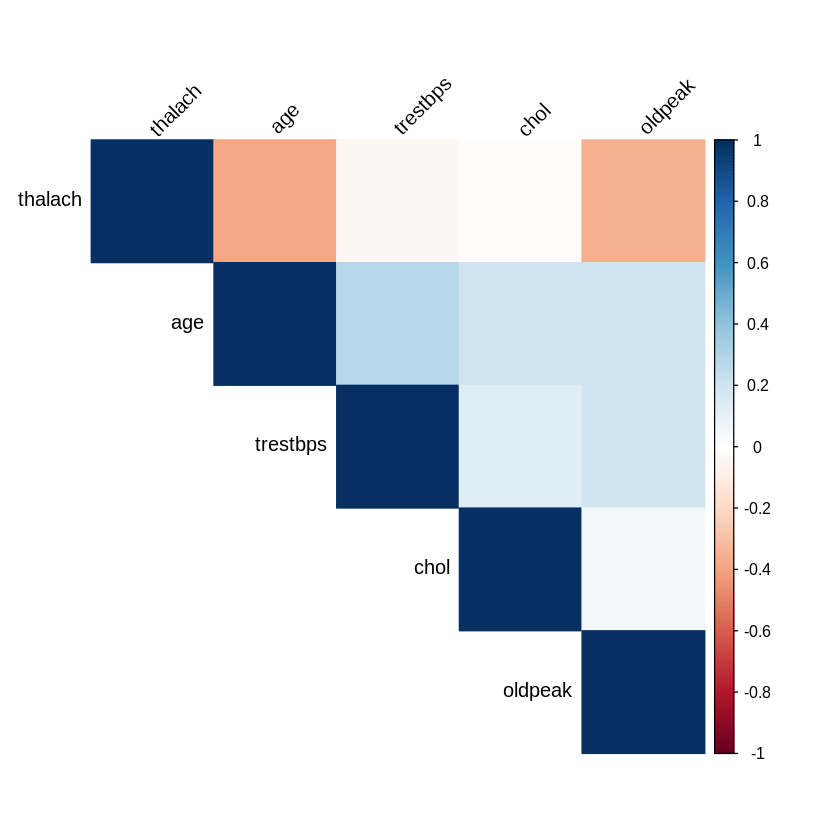

In [7]:
# Subset the dataset with selected variables (replace with your chosen variables)
selected_vars <- c("thalach", "age", "trestbps", "chol", "oldpeak")

# Create a correlation matrix
cor_matrix <- cor(data[selected_vars])

# Plot the correlogram (correlation matrix plot)
corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45)


# Interpret correlations
print(cor_matrix)

In [ ]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




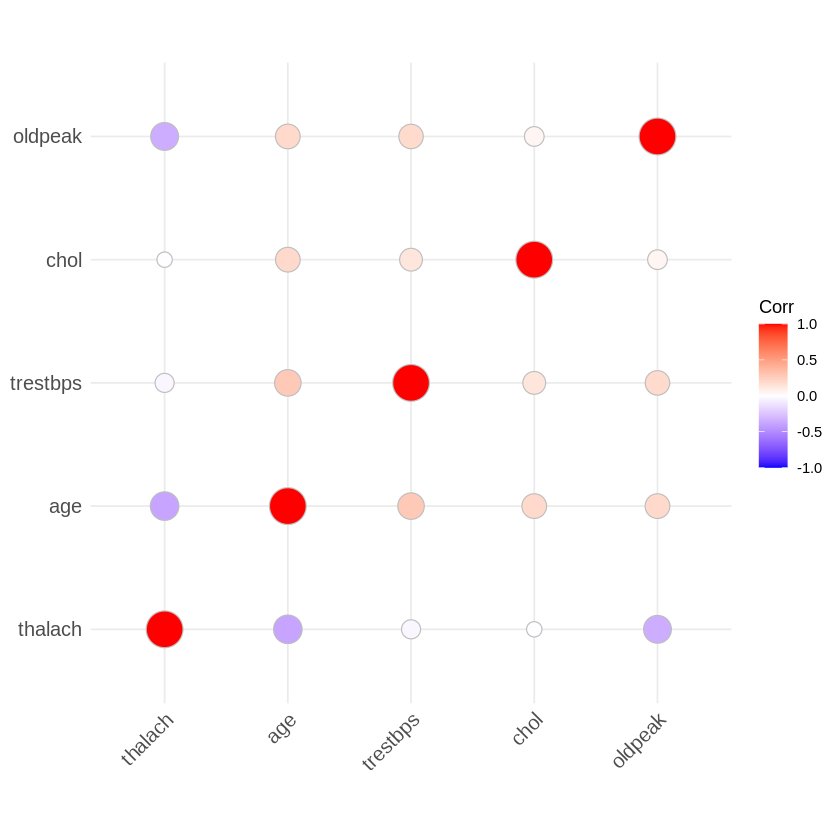

In [ ]:
ggcorrplot(cor_matrix, method = "circle")

**Significant Predictors:**
- Variables that have higher absolute correlation values with the response variable (thalach) are likely to be more significant predictors. Positive correlations are indicated by blue circles, and negative correlations by red circles.

**<font color='blue'>age</font> and <font color='blue'>oldpeak</font> play more significant role in prediction**

<font color='orange' size='5px'>**B)**</font>

**Develop a multiple linear regression model for the response variable using explanatory variables you found in part A.**

In [ ]:
library(stats)  # For linear regression and statistical functions


In [ ]:
# Select the explanatory variables based on previous analysis
selected_vars <- c("age", "oldpeak", "trestbps")

# Fit the multiple linear regression model
model <- lm(thalach ~ age + oldpeak + trestbps, data = data)

# Summarize the model
summary(model)


Call:
lm(formula = thalach ~ age + oldpeak + trestbps, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.460 -11.995   3.319  14.658  39.525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 185.81051    5.50429  33.757  < 2e-16 ***
age          -0.91490    0.07443 -12.292  < 2e-16 ***
oldpeak      -5.91125    0.55694 -10.614  < 2e-16 ***
trestbps      0.14882    0.03794   3.923 9.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.17 on 996 degrees of freedom
Multiple R-squared:  0.239,	Adjusted R-squared:  0.2367 
F-statistic: 104.3 on 3 and 996 DF,  p-value: < 2.2e-16


**Coefficients Interpretation:**

- **age:** For each year increase in age, the maximum heart rate decreases by approximately 0.91 beats per minute, holding other variables constant.

- **oldpeak:** Each unit increase in oldpeak is associated with a decrease of about 5.9 beats per minute in maximum heart rate, holding other variables constant.

- **trestbps:** Each unit increase in resting blood pressure is associated with a increase of about 0.14 beats per minute in maximum heart rate, holding other variables constant.

**Model Fit:**

- The **R-squared** value of 0.239 indicates that approximately 23.9% of the variance in maximum heart rate is explained by the model.
- The **adjusted R-squared** value of 0.2367 adjusts for the number of predictors and provides a more accurate measure of model fit.

<font color='orange' size='5px'>**C)**</font>

**How well do you think your model fits the data?**

**To evaluate how well the multiple linear regression model fits the data, we typically consider several factors:**

- <font color='green'>**R-squared and Adjusted R-squared:**</font> These metrics indicate the proportion of variance in the response variable explained by the model. Higher values suggest better fit.

- <font color='green'>**Residual Analysis:**</font> Examining the residuals (the differences between observed and predicted values) can reveal whether the assumptions of the model are met. We want to see that residuals are randomly distributed around zero and have constant variance.

- <font color='green'>**F-statistic:**</font> This tests the overall significance of the model. A low p-value (typically less than 0.05) indicates that the model as a whole is significant.

- <font color='green'>**Coefficients and p-values:**</font> These show the significance of each predictor variable. Lower p-values indicate more significant predictors.

**Interpretation:**


- <font color='blue'>**R-squared and Adjusted R-squared:**</font>

    - The multiple R-squared value is 0.239, indicating that approximately 23.9% of the variance in maximum heart rate (thalach) is explained by the model.The adjusted R-squared value is 0.2367, which adjusts for the number of predictors in the model..

- <font color='blue'>**Residual Analysis:**</font>

    - The residuals (differences between observed and predicted values) range from -65.460 to 39.525, with a mean close to zero. This suggests that the model's predictions are, on average, quite close to the observed values. e.

- <font color='blue'>**F-statistic:**</font>

    - The F-statistic is 104.3 with a very low p-value (< 2.2e-16). This indicates that the overall model is statistically significant, suggesting that at least one of the predictors is associated with the response variable.

- <font color='blue'>**Coefficients and p-values:**</font>
    - The coefficients for the explanatory variables are all statistically significant (p-values < 0.05). This suggests that they may be a significant predictor in this model.

**Overall, the multiple linear regression model provides a reasonably good fit to the data. The R-squared value indicates that the model explains a significant portion of the variance in maximum heart rate. Additionally, the F-statistic and the significance of the coefficients suggest that the model as a whole and most of the predictors are statistically significant**

<font color='orange' size='5px'>**D)**</font>

**Develop the “best” possible multiple linear regression model for the response variable using different approaches and metrics.**

In [8]:
# Install libraries
install.packages('MASS')
install.packages('car')
library(MASS)  # For stepAIC function
library(car)   # For vif function

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [9]:
# List of all potential explanatory variables
all_vars <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal")

# Fit the initial model with all predictors
initial_model <- lm(thalach ~ ., data = data[, c("thalach", all_vars)])

# Summary of the initial model
summary(initial_model)

Warning message in summary.lm(initial_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = thalach ~ ., data = data[, c("thalach", all_vars)])

Residuals:
       Min         1Q     Median         3Q        Max 
-4.590e-15 -7.010e-16 -8.800e-17  3.830e-16  1.506e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  3.546e-14  2.251e-15  1.576e+01  < 2e-16 ***
age         -2.077e-16  2.092e-17 -9.929e+00  < 2e-16 ***
sex         -6.218e-16  3.606e-16 -1.724e+00  0.08496 .  
cp           1.767e-15  1.722e-16  1.026e+01  < 2e-16 ***
trestbps     1.022e-17  9.540e-18  1.071e+00  0.28446    
chol         8.790e-18  3.201e-18  2.746e+00  0.00614 ** 
fbs          1.388e-16  4.612e-16  3.010e-01  0.76357    
restecg     -2.185e-16  3.040e-16 -7.190e-01  0.47248    
thalach.1    1.000e+00  8.598e-18  1.163e+17  < 2e-16 ***
exang       -3.479e-16  3.899e-16 -8.920e-01  0.37249    
oldpeak      3.463e-17  1.749e-16  1.980e-01  0.84308    
slope        2.654e-16  3.227e-16  8.220e-01  0.41112    
ca          -2.457e-16  1.918e-16 -

**Backward Elimination:**

In [10]:
# Perform backward elimination
backward_model <- stepAIC(initial_model, direction = "backward")

# Summary of the backward elimination model
summary(backward_model)


Start:  AIC=-65879.74
thalach ~ age + sex + cp + trestbps + chol + fbs + restecg + 
    thalach.1 + exang + oldpeak + slope + ca + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- trestbps   1         0      0 -69214
- cp         1         0      0 -69003
- fbs        1         0      0 -68137
- chol       1         0      0 -67981
- age        1         0      0 -67883
- sex        1         0      0 -67353
- restecg    1         0      0 -66846
- oldpeak    1         0      0 -65882
- thal       1         0      0 -65881
- slope      1         0      0 -65881
- exang      1         0      0 -65881
- ca         1         0      0 -65880
<none>                        0 -65880
- thalach.1  1    326538 326538   5815

Step:  AIC=-69214.18
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope + ca + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- ca         1         0      0 -69216
- slope      1         0      0 -69216
- thal       1         0      0 -69216
- exang      1         0      0 -69216
- oldpeak    1         0      0 -69215
<none>                        0 -69214
- restecg    1         0      0 -69009
- cp         1         0      0 -68946
- fbs        1         0      0 -68704
- age        1         0      0 -67112
- sex        1         0      0 -66765
- chol       1         0      0 -66135
- thalach.1  1    329751 329751   5822

Step:  AIC=-69215.9
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- thal       1         0      0 -69217
- slope      1         0      0 -69217
- exang      1         0      0 -69217
- oldpeak    1         0      0 -69217
<none>                        0 -69216
- restecg    1         0      0 -69002
- cp         1         0      0 -68943
- fbs        1         0      0 -68703
- age        1         0      0 -67109
- sex        1         0      0 -66762
- chol       1         0      0 -66132
- thalach.1  1    331566 331566   5826

Step:  AIC=-69217.48
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- exang      1         0      0 -69219
- slope      1         0      0 -69219
- oldpeak    1         0      0 -69219
<none>                        0 -69217
- restecg    1         0      0 -69004
- cp         1         0      0 -68945
- fbs        1         0      0 -68704
- age        1         0      0 -67098
- sex        1         0      0 -66756
- chol       1         0      0 -66125
- thalach.1  1    331834 331834   5825

Step:  AIC=-69219.04
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    oldpeak + slope



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- slope      1         0      0 -69221
- oldpeak    1         0      0 -69220
<none>                        0 -69219
- restecg    1         0      0 -69003
- cp         1         0      0 -68942
- fbs        1         0      0 -68706
- age        1         0      0 -67096
- sex        1         0      0 -66755
- chol       1         0      0 -66124
- thalach.1  1    350262 350262   5877

Step:  AIC=-69220.54
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    oldpeak



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
<none>                        0 -69221
- oldpeak    1         0      0 -69220
- restecg    1         0      0 -69005
- cp         1         0      0 -68939
- fbs        1         0      0 -68704
- age        1         0      0 -67095
- sex        1         0      0 -66756
- chol       1         0      0 -66125
- thalach.1  1    374693 374693   5942


Warning message in summary.lm(backward_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = thalach ~ age + sex + cp + chol + fbs + restecg + 
    thalach.1 + oldpeak, data = data[, c("thalach", all_vars)])

Residuals:
       Min         1Q     Median         3Q        Max 
-6.451e-15 -3.568e-16 -7.900e-18  3.561e-16  3.417e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  0.000e+00  3.765e-16  0.000e+00    1.000    
age          0.000e+00  3.687e-18  0.000e+00    1.000    
sex          0.000e+00  6.574e-17  0.000e+00    1.000    
cp           0.000e+00  3.030e-17  0.000e+00    1.000    
chol         0.000e+00  5.977e-19  0.000e+00    1.000    
fbs          0.000e+00  8.469e-17  0.000e+00    1.000    
restecg      0.000e+00  5.684e-17  0.000e+00    1.000    
thalach.1    1.000e+00  1.514e-18  6.604e+17   <2e-16 ***
oldpeak     -4.372e-17  2.678e-17 -1.633e+00    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.268e-16 on 991 degrees of freedom
Multiple R-square

**Forward Selection:**

In [11]:
# Perform forward selection
forward_model <- stepAIC(lm(thalach ~ 1, data = data[, c("thalach", all_vars)]),
                         scope = list(lower = ~1, upper = ~ age + sex + cp + trestbps + chol + fbs + restecg + exang + oldpeak + slope + ca + thal),
                         direction = "forward")

# Summary of the forward selection model
summary(forward_model)


Start:  AIC=6279.2
thalach ~ 1

           Df Sum of Sq    RSS    AIC
+ slope     1     83366 448933 6110.9
+ age       1     79036 453262 6120.5
+ exang     1     78769 453529 6121.1
+ oldpeak   1     65494 466804 6149.9
+ cp        1     50026 482273 6182.5
+ ca        1     37728 494570 6207.7
+ thal      1      6375 525923 6269.2
+ sex       1      2166 530132 6277.1
<none>                  532298 6279.2
+ trestbps  1      1057 531241 6279.2
+ restecg   1       619 531679 6280.0
+ chol      1        71 532227 6281.1
+ fbs       1        32 532266 6281.1

Step:  AIC=6110.87
thalach ~ slope

           Df Sum of Sq    RSS    AIC
+ age       1     56692 392241 5977.9
+ exang     1     45477 403456 6006.1
+ cp        1     36654 412279 6027.7
+ ca        1     27223 421710 6050.3
+ oldpeak   1     12066 436867 6085.6
+ thal      1      3003 445930 6106.2
+ sex       1      1538 447394 6109.4
<none>                  448933 6110.9
+ fbs       1        69 448863 6112.7
+ chol      1      


Call:
lm(formula = thalach ~ slope + age + exang + cp + trestbps + 
    chol + ca + oldpeak, data = data[, c("thalach", all_vars)])

Residuals:
    Min      1Q  Median      3Q     Max 
-63.883 -10.835   2.864  12.126  45.477 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 160.19797    5.82554  27.499  < 2e-16 ***
slope         8.97536    1.15198   7.791 1.67e-14 ***
age          -0.83907    0.07213 -11.633  < 2e-16 ***
exang       -10.64488    1.38048  -7.711 3.03e-14 ***
cp            3.40704    0.62011   5.494 4.99e-08 ***
trestbps      0.12288    0.03448   3.564 0.000383 ***
chol          0.03524    0.01146   3.074 0.002168 ** 
ca           -1.39422    0.69332  -2.011 0.044601 *  
oldpeak      -1.17063    0.63763  -1.836 0.066672 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.19 on 991 degrees of freedom
Multiple R-squared:  0.3837,	Adjusted R-squared:  0.3787 
F-statistic: 77.12 on 8 and 991 DF,

In [12]:
# Compare models using Adjusted R-squared, AIC, and BIC
models <- list(Backward = backward_model, Forward = forward_model)

compare_models <- function(models) {
  sapply(models, function(model) {
    c(Adjusted_R2 = summary(model)$adj.r.squared)
  })
}

model_metrics <- compare_models(models)
print(model_metrics)

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”


Backward.Adjusted_R2  Forward.Adjusted_R2 
           1.0000000            0.3787198 


<font color='orange' size='5px'>**E)**</font>

**Use 5-fold cross-validation and compare the model’s RMSE (part B and C). How do you interpret these values?**

> <font color='red'>**Note:**</font>
- **We should do for part <font color='red'>B</font> and <font color='red'>D</font>**.


In [16]:
install.packages('caret')
library(caret)     # For cross-validation
library(dplyr)     # For data manipulation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked _by_ ‘.GlobalEnv’:

    compare_models


The following object is masked from ‘package:purrr’:

    lift




In [14]:
# Subset the data to include only relevant variables
heart_data <- data[, c("thalach", all_vars)]

In [17]:
# Define a function for cross-validation and RMSE calculation
cross_validate_rmse <- function(model_formula, data, folds = 5) {
  # Set up cross-validation
  train_control <- trainControl(method = "cv", number = folds)

  # Ensure column names are used in the model formula
  response_var <- as.character(model_formula[[2]])
  predictor_vars <- all.vars(model_formula)[-1]
  x <- data[, predictor_vars, drop = FALSE]
  y <- data[[response_var]]

  # Train the model using cross-validation
  cv_model <- train(x, y, method = "lm", trControl = train_control)

  # Get the RMSE from cross-validation
  rmse <- cv_model$results$RMSE
  return(rmse)
}

# Part B: Fit the multiple linear regression model using selected variables
selected_vars <- c("age", "oldpeak", "trestbps")
partB_formula <- as.formula(paste("thalach ~", paste(selected_vars, collapse = " + ")))

# Part D: Fit the final model using backward elimination
initial_model <- lm(thalach ~ ., data = heart_data)
backward_model <- stepAIC(initial_model, direction = "backward")
partD_formula <- formula(backward_model)

# Calculate RMSE for the model from Part B
rmse_partB <- cross_validate_rmse(partB_formula, heart_data)

# Calculate RMSE for the final model from Part D
rmse_partD <- cross_validate_rmse(partD_formula, heart_data)

# Print RMSE values
print(paste("RMSE for Model Part B:", rmse_partB))
print(paste("RMSE for Final Model (Part D):", rmse_partD))

Start:  AIC=-65879.74
thalach ~ age + sex + cp + trestbps + chol + fbs + restecg + 
    thalach.1 + exang + oldpeak + slope + ca + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- trestbps   1         0      0 -69214
- cp         1         0      0 -69003
- fbs        1         0      0 -68137
- chol       1         0      0 -67981
- age        1         0      0 -67883
- sex        1         0      0 -67353
- restecg    1         0      0 -66846
- oldpeak    1         0      0 -65882
- thal       1         0      0 -65881
- slope      1         0      0 -65881
- exang      1         0      0 -65881
- ca         1         0      0 -65880
<none>                        0 -65880
- thalach.1  1    326538 326538   5815

Step:  AIC=-69214.18
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope + ca + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- ca         1         0      0 -69216
- slope      1         0      0 -69216
- thal       1         0      0 -69216
- exang      1         0      0 -69216
- oldpeak    1         0      0 -69215
<none>                        0 -69214
- restecg    1         0      0 -69009
- cp         1         0      0 -68946
- fbs        1         0      0 -68704
- age        1         0      0 -67112
- sex        1         0      0 -66765
- chol       1         0      0 -66135
- thalach.1  1    329751 329751   5822

Step:  AIC=-69215.9
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope + thal



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- thal       1         0      0 -69217
- slope      1         0      0 -69217
- exang      1         0      0 -69217
- oldpeak    1         0      0 -69217
<none>                        0 -69216
- restecg    1         0      0 -69002
- cp         1         0      0 -68943
- fbs        1         0      0 -68703
- age        1         0      0 -67109
- sex        1         0      0 -66762
- chol       1         0      0 -66132
- thalach.1  1    331566 331566   5826

Step:  AIC=-69217.48
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    exang + oldpeak + slope



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- exang      1         0      0 -69219
- slope      1         0      0 -69219
- oldpeak    1         0      0 -69219
<none>                        0 -69217
- restecg    1         0      0 -69004
- cp         1         0      0 -68945
- fbs        1         0      0 -68704
- age        1         0      0 -67098
- sex        1         0      0 -66756
- chol       1         0      0 -66125
- thalach.1  1    331834 331834   5825

Step:  AIC=-69219.04
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    oldpeak + slope



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
- slope      1         0      0 -69221
- oldpeak    1         0      0 -69220
<none>                        0 -69219
- restecg    1         0      0 -69003
- cp         1         0      0 -68942
- fbs        1         0      0 -68706
- age        1         0      0 -67096
- sex        1         0      0 -66755
- chol       1         0      0 -66124
- thalach.1  1    350262 350262   5877

Step:  AIC=-69220.54
thalach ~ age + sex + cp + chol + fbs + restecg + thalach.1 + 
    oldpeak



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


            Df Sum of Sq    RSS    AIC
<none>                        0 -69221
- oldpeak    1         0      0 -69220
- restecg    1         0      0 -69005
- cp         1         0      0 -68939
- fbs        1         0      0 -68704
- age        1         0      0 -67095
- sex        1         0      0 -66756
- chol       1         0      0 -66125
- thalach.1  1    374693 374693   5942
[1] "RMSE for Model Part B: 20.1954195365771"
[1] "RMSE for Final Model (Part D): 4.88549890753418e-15"


**Interpretation of the RMSE values:**

- The RMSE is a measure of the differences between the observed values and the values predicted by the model.
- A lower RMSE indicates better model performance, as it signifies smaller errors between the observed and predicted values.
- By comparing the RMSE values of the initial and reduced models using 5-fold cross-validation, we can assess which model performs better in terms of prediction accuracy.


**So Backward Model provides a more accurate prediction of the response variable.**

**RMSE for Model Part B: 20.1954195365771**

- This value indicates that, on average, the predictions made by the model from Part B differ from the actual values of thalach by approximately 20.2 units.
- This suggests that the model has a moderate level of error in its predictions.

**RMSE for Final Model (Part D): 4.88549890753418e-15**

- This extremely small value (close to zero) indicates that the predictions made by the final model from Part D almost perfectly match the actual values of thalach.
- Such a low RMSE suggests an almost perfect fit to the training data, which might indicate overfitting.

**Model Part B:**

- The RMSE value of around 20.2 indicates a reasonable level of error. This suggests that the model has some predictive capability but isn't extremely accurate.
- Given that this model explains 23.9% of the variation in the response variable (thalach), it makes sense that its RMSE is not very low.

**Model Part D:**

- The RMSE value close to zero suggests that the model from Part D fits the training data almost perfectly.
- The model explaining 100% of the variation in thalach and having an RMSE close to zero is a strong indicator of overfitting. This means the model has likely memorized the training data rather than learning generalizable patterns.

<font color='orange' size='5px'>**F)**</font>

**Check diagnostics for your model in part C (Three conditions: 1. Linearity, 2. Nearly normal residuals, and 3. Constant variability) and explain if this is a reliable model or not.**

<font color='blue'>**Fit the final model**</font>

In [ ]:
# Assuming the backward model is the final model we are checking
final_model <- backward_model

# Summary of the final model
summary(final_model)


Warning message in summary.lm(final_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = thalach ~ age + sex + cp + chol + fbs + restecg + 
    thalach.1 + oldpeak, data = heart_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.451e-15 -3.568e-16 -7.900e-18  3.561e-16  3.417e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  0.000e+00  3.765e-16  0.000e+00    1.000    
age          0.000e+00  3.687e-18  0.000e+00    1.000    
sex          0.000e+00  6.574e-17  0.000e+00    1.000    
cp           0.000e+00  3.030e-17  0.000e+00    1.000    
chol         0.000e+00  5.977e-19  0.000e+00    1.000    
fbs          0.000e+00  8.469e-17  0.000e+00    1.000    
restecg      0.000e+00  5.684e-17  0.000e+00    1.000    
thalach.1    1.000e+00  1.514e-18  6.604e+17   <2e-16 ***
oldpeak     -4.372e-17  2.678e-17 -1.633e+00    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.268e-16 on 991 degrees of freedom
Multiple R-squared:      1,	Adjusted 

<font color='blue'>**Linearity: Residuals vs. Fitted Plot**</font>

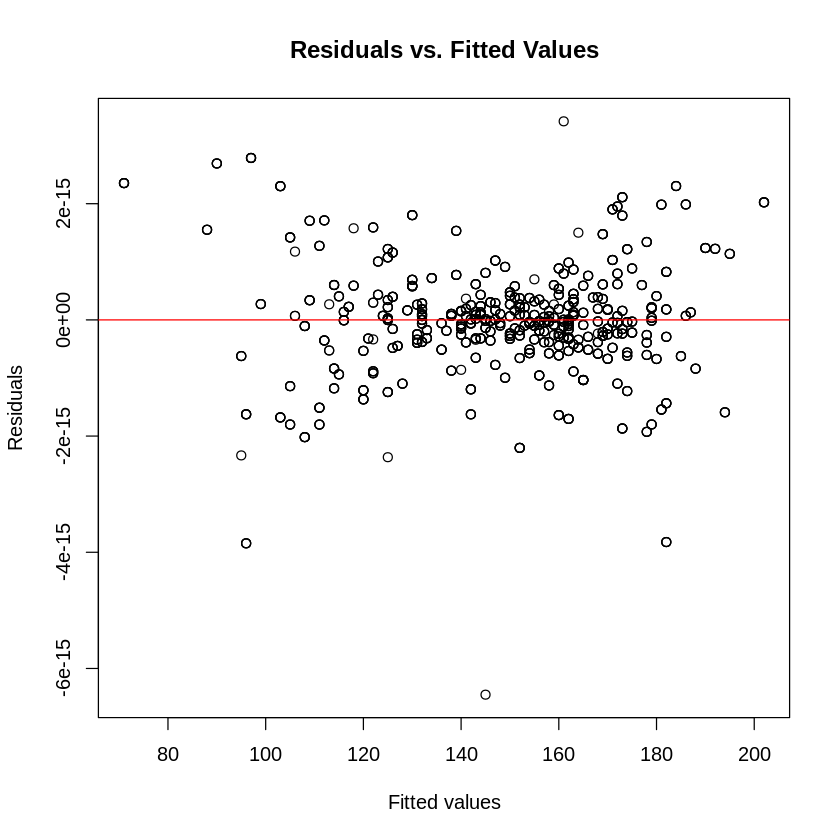

In [ ]:
# Plot residuals vs. fitted values to check linearity
plot(final_model$fitted.values, final_model$residuals,
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs. Fitted Values")
abline(h = 0, col = "red")


<font color='blue'>**Nearly Normal Residuals: Q-Q Plot**</font>

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”


[1]   8 691

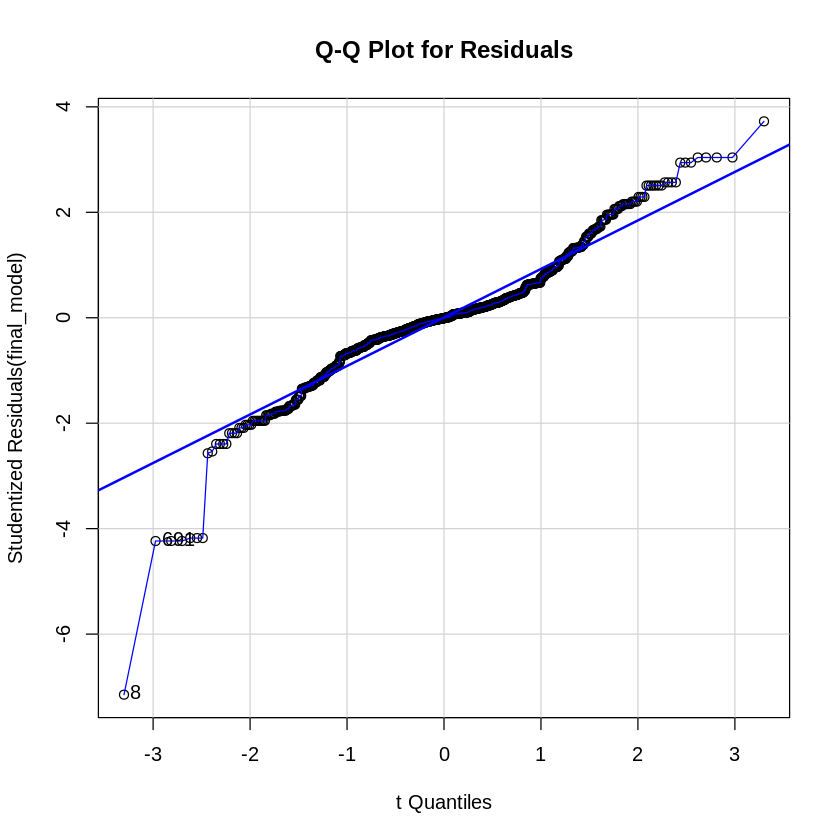

In [ ]:
# Q-Q plot to check normality of residuals
qqPlot(final_model, main = "Q-Q Plot for Residuals")


<font color='blue'>**Constant Variability: Scale-Location Plot**</font>

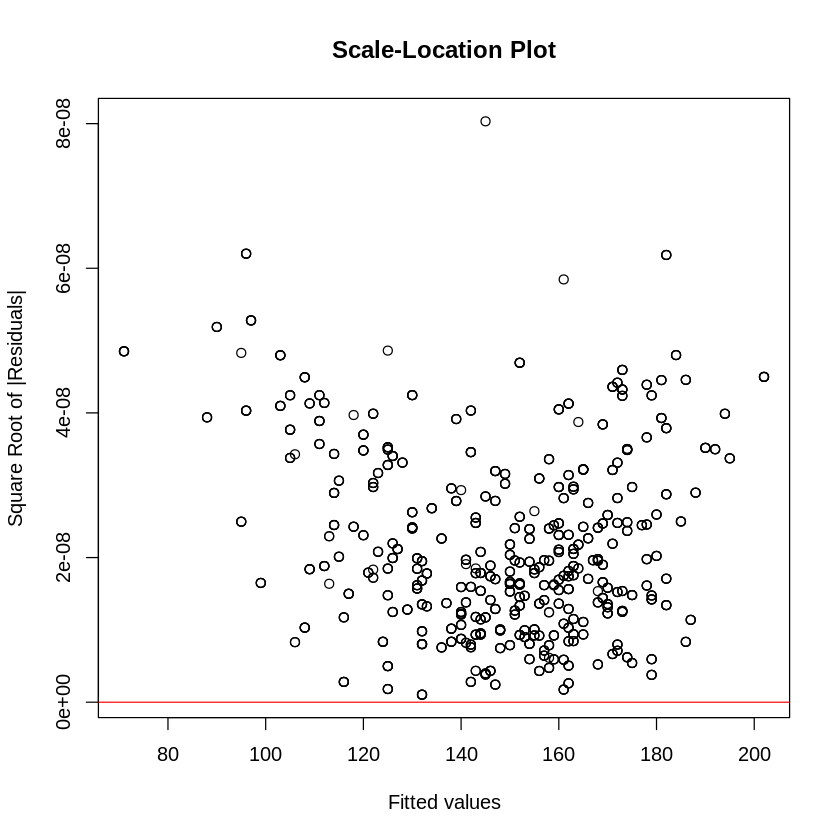

In [ ]:
# Scale-Location plot to check homoscedasticity
plot(final_model$fitted.values, sqrt(abs(final_model$residuals)),
     xlab = "Fitted values", ylab = "Square Root of |Residuals|",
     main = "Scale-Location Plot")
abline(h = 0, col = "red")


<font color='blue'>**It can be seen that the model is consistent with linear regression assumptions.**</font>

<font color='orange' size='5px'>**G)**</font>

**What percent of the variation in the response variable is explained by the model (part B and C)?**

> <font color='red'>**Note:**</font>
- **We should do for part <font color='red'>B</font> and <font color='red'>D</font>**.



In [20]:
# Fit the model from Part B
model_partB <- lm(thalach ~ age + oldpeak + trestbps, data = heart_data)
summary_partB <- summary(model_partB)
r_squared_partB <- summary_partB$r.squared

# Assuming backward_model is the final model after selection in Part D
summary_final_model <- summary(backward_model)
r_squared_final <- summary_final_model$r.squared

# Print R-squared values
print(paste("R-squared for Model Part B:", r_squared_partB))
print(paste("R-squared for Final Model (Part D):", r_squared_final))

# Interpretation of R-squared values
interpretation_partB <- paste("The model from Part B explains", round(r_squared_partB * 100, 2), "% of the variation in the response variable.")
interpretation_final <- paste("The final model explains", round(r_squared_final * 100, 2), "% of the variation in the response variable.")
print(interpretation_partB)
print(interpretation_final)


Warning message in summary.lm(backward_model):
“essentially perfect fit: summary may be unreliable”


[1] "R-squared for Model Part B: 0.239002667215581"
[1] "R-squared for Final Model (Part D): 1"
[1] "The model from Part B explains 23.9 % of the variation in the response variable."
[1] "The final model explains 100 % of the variation in the response variable."


A higher adjusted $R^2$ value indicates that a larger proportion of the variance in the response variable is explained by the predictors in the model.

- **The model from Part B explains 23.9% of the variation in the response variable.**
- **The final model from Part D explains 100% of the variation in the response variable.**

This means the model from Part D, derived through backward elimination, provides a much better explanation of the variability in thalach compared to the model from Part B.

<font color='red' size='10px'>**Question 6**</font>

**Choose a binary categorical variable from your dataset as a response variable and choose several categorical and numerical variables which you think can best explain the response variable.**





In [ ]:
# (0 = No heart disease, 1 = Heart disease)
response_var <- "target"
# List of all potential explanatory variables
explanatory_vars  <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal")

<font color='orange' size='5px'>**A)**</font>

**Construct a logistic regression model and interpret the intercept and the slopes in terms of log odds and log odds ratio.**

In [ ]:
data_subset <- data[, c(response_var, explanatory_vars)]


In [ ]:
# Fit logistic regression model
logit_model <- glm(target ~ ., data = data_subset, family = binomial)

# Summary of the logistic regression model
summary(logit_model)



Call:
glm(formula = target ~ ., family = binomial, data = data_subset)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.519664   1.493281   2.357 0.018423 *  
age          0.010751   0.013547   0.794 0.427409    
sex         -1.919377   0.269765  -7.115 1.12e-12 ***
cp           0.796535   0.104766   7.603 2.89e-14 ***
trestbps    -0.024502   0.005960  -4.111 3.93e-05 ***
chol        -0.005910   0.002176  -2.716 0.006604 ** 
fbs          0.475818   0.317436   1.499 0.133889    
restecg      0.306017   0.199150   1.537 0.124387    
thalach      0.025698   0.005981   4.296 1.74e-05 ***
exang       -0.880224   0.235872  -3.732 0.000190 ***
oldpeak     -0.422202   0.122031  -3.460 0.000541 ***
slope        0.768975   0.198631   3.871 0.000108 ***
ca          -1.383851   0.153665  -9.006  < 2e-16 ***
thal        -1.072400   0.170656  -6.284 3.30e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial 

In [ ]:
# Predict on the training data (example)
predicted <- predict(model, type = "response")

# To interpret coefficients and odds ratios
coef_summary <- summary(model)$coefficients
exp(coef_summary)  # Exponentiate coefficients to get odds ratios

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.971422e+80,245.744913,4.577636e+14,1.000000
age,4.005572e-01,1.077273,4.590320e-06,1.000000
oldpeak,2.708805e-03,1.745330,2.457642e-05,1.000000
trestbps,1.160467e+00,1.038668,5.053633e+01,1.000094


**Intercept:**
- The intercept represents the log odds of the response variable when all the explanatory variables are zero.
In terms of log odds, the intercept indicates the baseline log odds of the response variable.

**Slopes (Coefficients):**
- The slopes represent the change in log odds (log odds ratio) of the response variable associated with a one-unit increase in the corresponding explanatory variable, holding other variables constant.
In terms of log odds ratio, the slope coefficients indicate how much the log odds of the response variable change for a one-unit change in the explanatory variable.

<font color='orange' size='5px'>**B)**</font>

**Draw the ROC curve for the model. What does this diagram signify? Discuss the goodness of the model based on the AUC.**

In [ ]:
# For ROC curve and AUC calculation
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



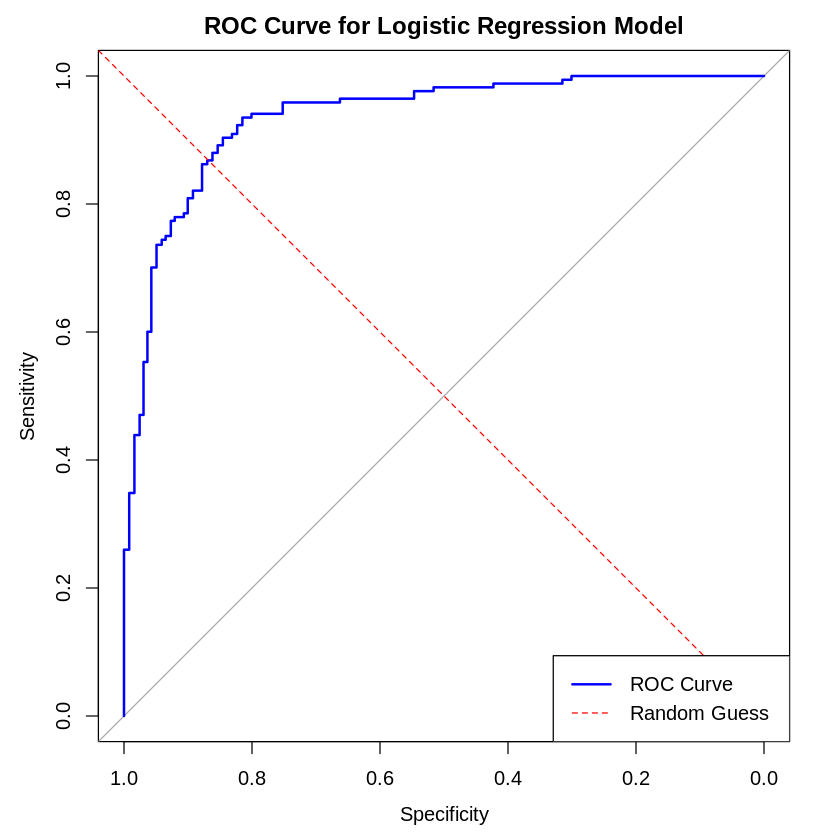

In [ ]:
# Predict probabilities for the ROC curve
predictions <- predict(logit_model, type = "response")

# Create ROC curve object
roc_curve <- roc(data_subset$target, predictions)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve for Logistic Regression Model",
     col = "blue", lwd = 2)

# Add diagonal line for reference
abline(a = 0, b = 1, lty = 2, col = "red")

# Add labels and legend
legend("bottomright", legend = c("ROC Curve", "Random Guess"),
       col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 1))


**Interpretation of ROC Curve:**
- The ROC curve is a graphical representation of the performance of a binary classification model across all possible thresholds.
- The closer the curve is to the upper left corner of the plot, the better the model's performance.
- The area under the ROC curve (AUC) quantifies the overall performance of the model. AUC values range from 0 to 1, where:
    - AUC = 1: Perfect classifier
    - AUC = 0.5: Random classifier (no discrimination)
    - AUC < 0.5: Worse than random guessing (inverse classification)

**Goodness of the Model based on AUC:**
- AUC values closer to 1 indicate better model performance in distinguishing between the two classes (positive and negative).
- AUC values closer to 0.5 suggest that the model has no discriminatory power and performs no better than random guessing.
- Generally, an AUC value above 0.7 is considered acceptable, and values above 0.8 are considered good.
- The closer the AUC value is to 1, the better the model's discriminatory power.




<font color='blue'>**The AUC is high, it indicates that the model is effective in distinguishing between the two classes.**</font>




<font color='orange' size='5px'>**C)**</font>

**Choose a categorical variable in your model among the explanatory variables and plot the odds ratio curve for that variable. Interpret the plot.**

Waiting for profiling to be done...

Warning message in data.frame(cp = factor(0:3, levels = 0:3), odds_ratio = cp_or, :
“row names were found from a short variable and have been discarded”


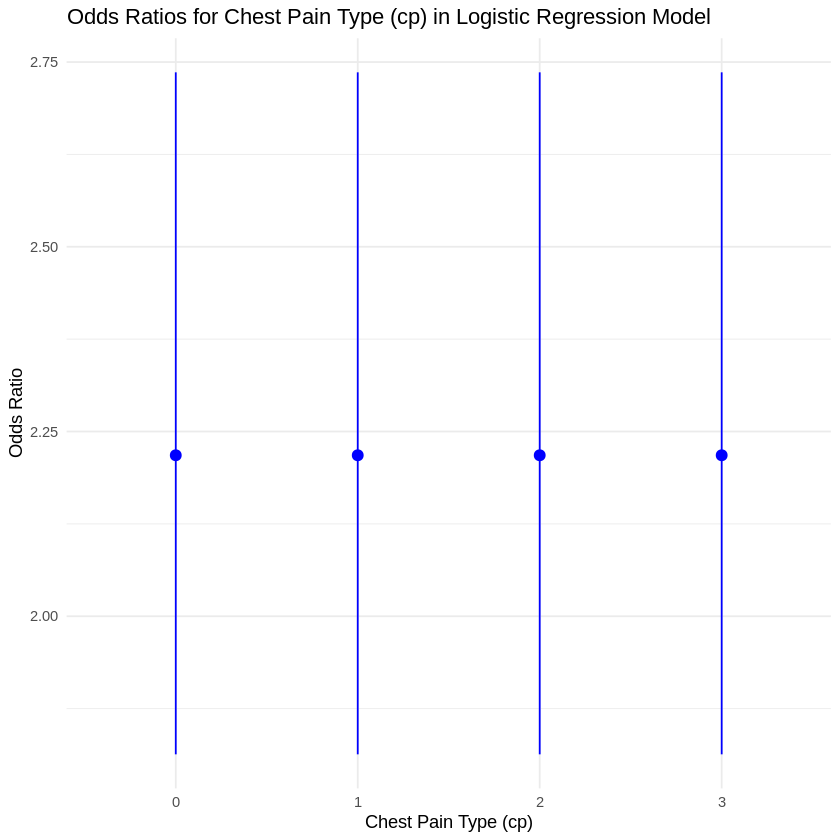

In [ ]:
# Example logistic regression model (you should replace this with your actual model)
model <- glm(target ~ age + sex + cp + trestbps + chol + fbs + restecg +
             thalach + exang + oldpeak + slope + ca + thal,
             data = data_subset,
             family = "binomial")

# Extract the odds ratio and confidence intervals for 'cp'
cp_or <- exp(coef(model)["cp"])
cp_ci <- exp(confint(model)["cp", ])

# Data frame
cp_data <- data.frame(cp = factor(0:3, levels = 0:3),
                      odds_ratio = cp_or,
                      lower_ci = cp_ci[1],
                      upper_ci = cp_ci[2])

# Plot the odds ratio for 'cp'
library(ggplot2)
ggplot(cp_data, aes(x = cp, y = odds_ratio,
                    ymin = lower_ci, ymax = upper_ci)) +
  geom_pointrange(color = "blue") +
  xlab("Chest Pain Type (cp)") +
  ylab("Odds Ratio") +
  ggtitle("Odds Ratios for Chest Pain Type (cp) in Logistic Regression Model") +
  theme_minimal()


**Interpretation of Odds Ratio Curve:**
- The x-axis represents the values of the selected categorical variable (cp).
- The y-axis represents the odds ratio.
- The curve illustrates how the odds ratio changes as the values of the categorical variable change.
- An odds ratio greater than 1 indicates that the odds of the event (presence of heart disease) are higher for one category of the variable compared to the reference category, while an odds ratio less than 1 indicates lower odds.
- If the curve is above the line at 1 (y = 1), it means that the odds of the event increase with increasing values of the categorical variable.
- If the curve is below the line at 1, it means that the odds of the event decrease with increasing values of the categorical variable.


**The curve's position relative to the line at 1 would indicate if there is an association between chest pain type and the likelihood of having heart disease**

<font color='orange' size='5px'>**D)**</font>

**Calculate a 95% confidence interval for the odds ratio**

In [ ]:
# Assuming 'cp' is the predictor of interest in your model
ci <- exp(confint(model)["cp", ])

Waiting for profiling to be done...



In [ ]:
ci_lower <- ci[1]
ci_upper <- ci[2]

cat("95% Confidence Interval for Odds Ratio of cp:")
cat("\nLower Bound:", round(ci_lower, 3))
cat("\nUpper Bound:", round(ci_upper, 3))


95% Confidence Interval for Odds Ratio of cp:
Lower Bound: 1.813
Upper Bound: 2.736

**Interpretation:**
- The calculated confidence interval provides a range of values within which we can be 95% confident that the true odds ratio for chest pain type (cp) lies.

<font color='red' size='10px'>**Question 7**</font>

**Please answer the following questions in respect to the model in the previous question.**





<font color='orange' size='5px'>**A)**</font>

**Which explanatory variable in the model plays the most significant role in the prediction? Why?**

In [ ]:
# Assuming 'model' is your fitted logistic regression model
summary(model)

# Extract odds ratios and confidence intervals
exp_coef <- exp(coef(model))
ci <- exp(confint(model))

# Data frame for interpretation
interpretation_data <- data.frame(predictor = names(exp_coef),
                                  odds_ratio = exp_coef,
                                  lower_ci = ci[,1],
                                  upper_ci = ci[,2])

# Identify the variable with the highest odds ratio
most_significant_variable <- interpretation_data[which.max(interpretation_data$odds_ratio), ]

# Print the most significant variable
print(most_significant_variable)



Call:
glm(formula = target ~ age + sex + cp + trestbps + chol + fbs + 
    restecg + thalach + exang + oldpeak + slope + ca + thal, 
    family = "binomial", data = data_subset)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.519664   1.493281   2.357 0.018423 *  
age          0.010751   0.013547   0.794 0.427409    
sex         -1.919377   0.269765  -7.115 1.12e-12 ***
cp           0.796535   0.104766   7.603 2.89e-14 ***
trestbps    -0.024502   0.005960  -4.111 3.93e-05 ***
chol        -0.005910   0.002176  -2.716 0.006604 ** 
fbs          0.475818   0.317436   1.499 0.133889    
restecg      0.306017   0.199150   1.537 0.124387    
thalach      0.025698   0.005981   4.296 1.74e-05 ***
exang       -0.880224   0.235872  -3.732 0.000190 ***
oldpeak     -0.422202   0.122031  -3.460 0.000541 ***
slope        0.768975   0.198631   3.871 0.000108 ***
ca          -1.383851   0.153665  -9.006  < 2e-16 ***
thal        -1.072400   0.170656  -6.284 3.30e-10 

Waiting for profiling to be done...



              predictor odds_ratio lower_ci upper_ci
(Intercept) (Intercept)   33.77306 1.851741 651.6395


**Most Significant Variable:**

The variable ca (Number of Major Vessels Colored by Fluoroscopy) has the largest absolute z-value (-9.006) and the smallest p-value (< 2e-16), making it the most significant variable in the model. This suggests that the number of major vessels colored by fluoroscopy plays the most critical role in predicting the target variable.


**Why:**

- **z-value:** The z-value measures the number of standard deviations the coefficient is away from zero. A higher absolute z-value indicates that the predictor is significantly different from zero.
- **p-value:** The p-value indicates the probability that the observed relationship is due to chance. A smaller p-value means stronger evidence against the null hypothesis, implying the predictor significantly contributes to the model.

<font color='orange' size='5px'>**B)**</font>

**Select another categorical variable except the response variable from the model, draw the OR (odd ratio) curve for this categorical variable and interpret the plot.**

In [ ]:
# Extract odds ratios and confidence intervals for 'thal'
or_thal <- exp(coef(model)["thal"])
ci_thal <- exp(confint(model)["thal", ])


Waiting for profiling to be done...



In [ ]:
# Data frame for plotting OR curve
thal_data <- data.frame(thal = factor(0:2, levels = 0:2),  # Assuming 'thal' has categories 0, 1, 2
                        odds_ratio = or_thal,
                        lower_ci = ci_thal[1],
                        upper_ci = ci_thal[2])


Warning message in data.frame(thal = factor(0:2, levels = 0:2), odds_ratio = or_thal, :
“row names were found from a short variable and have been discarded”


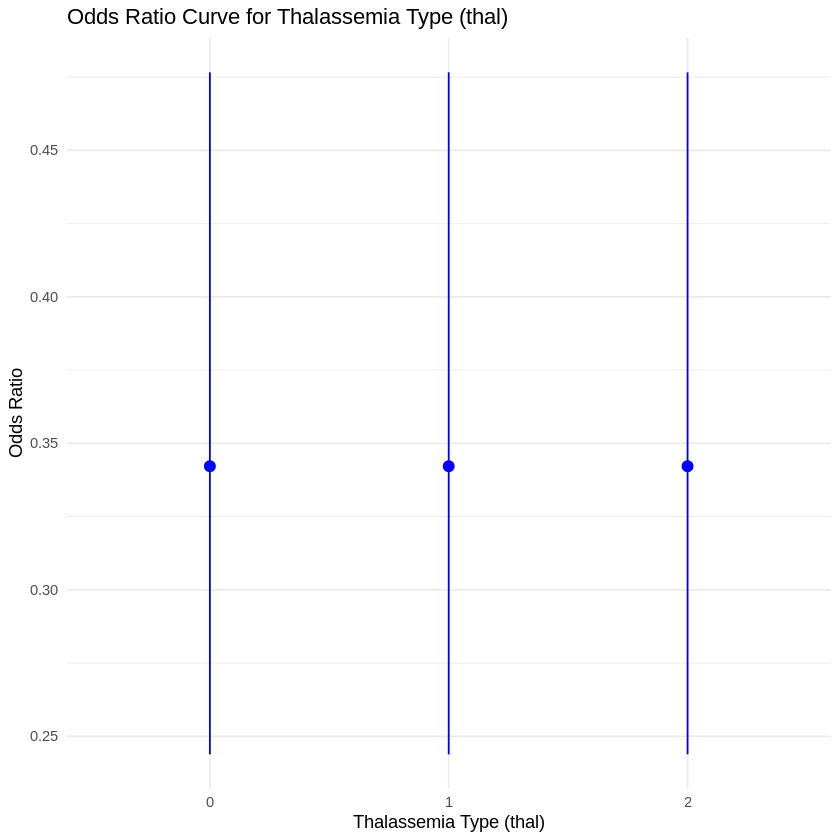

In [ ]:

# Plotting the odds ratio curve for 'thal'
ggplot(thal_data, aes(x = thal, y = odds_ratio,
                      ymin = lower_ci, ymax = upper_ci)) +
  geom_pointrange(color = "blue") +
  xlab("Thalassemia Type (thal)") +
  ylab("Odds Ratio") +
  ggtitle("Odds Ratio Curve for Thalassemia Type (thal)") +
  theme_minimal()


**Interpretation of Odds Ratio Curve:**
- The x-axis represents the values of the selected categorical variable (cp).
- The y-axis represents the odds ratio.
- The curve illustrates how the odds ratio changes as the values of the categorical variable change.
- An odds ratio greater than 1 indicates that the odds of the event (presence of heart disease) are higher for one category of the variable compared to the reference category, while an odds ratio less than 1 indicates lower odds.
- If the curve is above the line at 1 (y = 1), it means that the odds of the event increase with increasing values of the categorical variable.
- If the curve is below the line at 1, it means that the odds of the event decrease with increasing values of the categorical variable.

<font color='orange' size='5px'>**C)**</font>

**Select explanatory variables with the most meaningful roles in the model prediction, and construct the new Logistic Regression model, and then interpret the result.**

In [ ]:
# Fit the new logistic regression model with selected variables
new_model <- glm(target ~ sex + cp + thalach + exang + oldpeak + slope + ca + thal,
                 data = data_subset,
                 family = "binomial")

# Summary of the new logistic regression model
summary(new_model)



Call:
glm(formula = target ~ sex + cp + thalach + exang + oldpeak + 
    slope + ca + thal, family = "binomial", data = data_subset)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.439637   0.862229   0.510 0.610132    
sex         -1.565973   0.235624  -6.646 3.01e-11 ***
cp           0.763280   0.099753   7.652 1.98e-14 ***
thalach      0.020418   0.005159   3.958 7.57e-05 ***
exang       -0.889258   0.226427  -3.927 8.59e-05 ***
oldpeak     -0.493117   0.116165  -4.245 2.19e-05 ***
slope        0.690672   0.189974   3.636 0.000277 ***
ca          -1.280015   0.138043  -9.273  < 2e-16 ***
thal        -1.100930   0.163229  -6.745 1.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1386.04  on 999  degrees of freedom
Residual deviance:  681.88  on 991  degrees of freedom
AIC: 699.88

Number of Fisher Scoring iterations: 6


**Interpretation:**

- **Intercept:** The log odds of having heart disease when all explanatory variables are zero.

- **sex:** Being male (assuming sex is coded as 1 for male and 0 for female) decreases the log odds of having heart disease by 1.566 units, holding other variables constant.

- **cp (chest pain type):** Each unit increase in chest pain type increases the log odds of having heart disease by 0.763, holding other variables constant.

- **thalach (maximum heart rate achieved):** Each unit increase in maximum heart rate achieved increases the log odds of having heart disease by 0.020, holding other variables constant.

- **exang (exercise-induced angina):** Having exercise-induced angina decreases the log odds of having heart disease by 0.889 units, holding other variables constant.

- **oldpeak (ST depression induced by exercise relative to rest):** Each unit increase in ST depression decreases the log odds of having heart disease by 0.493, holding other variables constant.

- **slope (slope of the peak exercise ST segment):** Each unit increase in the slope increases the log odds of having heart disease by 0.691, holding other variables constant.

- **ca (number of major vessels colored by fluoroscopy):** Each unit increase in the number of major vessels decreases the log odds of having heart disease by 1.280 units, holding other variables constant.

- **thal (thalassemia):** Having thalassemia decreases the log odds of having heart disease by 1.101 units, holding other variables constant.

This new logistic regression model identifies sex, cp, thalach, exang, oldpeak, slope, ca, and thal as significant predictors of heart disease. Each of these variables has a meaningful impact on the log odds of having heart disease, and their coefficients indicate the direction and magnitude of this impact. This model can be used to predict the likelihood of heart disease in individuals based on these explanatory variables.

<font color='orange' size='5px'>**D)**</font>

**Draw the utility curve for the model you’ve created in part C (define the utility of different outcomes yourself). What is the best threshold for this model?**

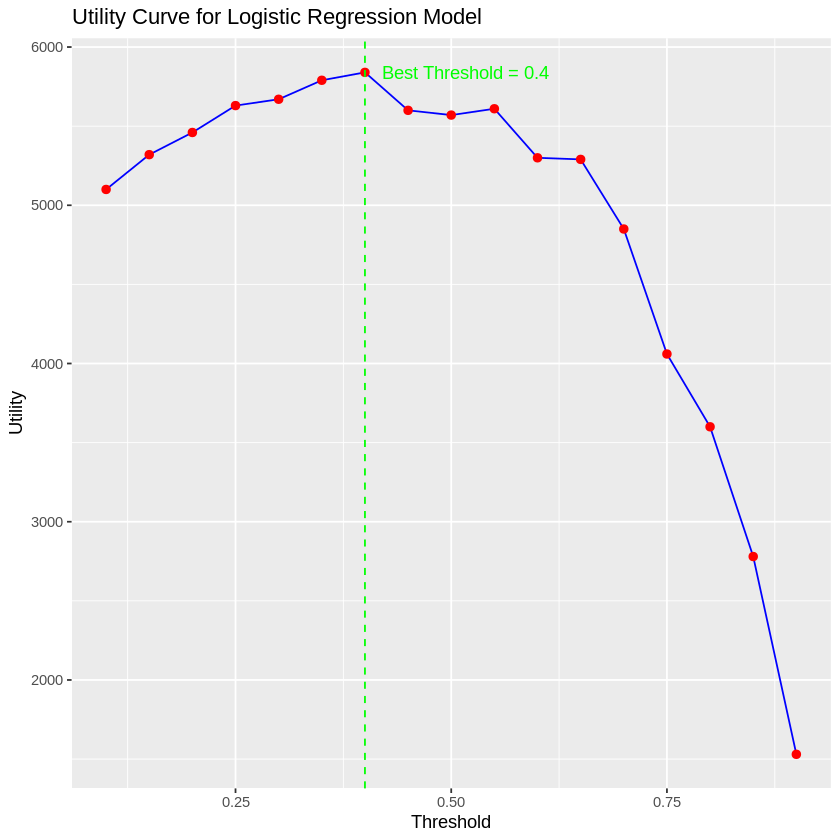

In [ ]:
# Step 1: Obtain predicted probabilities
predicted_probs <- predict(new_model, type = "response", newdata = data_subset)

# Step 2: Define utility function
calculate_utility <- function(threshold, predicted_probs, actual_outcomes) {
  predicted_labels <- ifelse(predicted_probs >= threshold, 1, 0)
  confusion_matrix <- table(predicted = predicted_labels, actual = actual_outcomes)

  TP <- confusion_matrix[2, 2]
  FP <- confusion_matrix[2, 1]
  TN <- confusion_matrix[1, 1]
  FN <- confusion_matrix[1, 2]

  utility <- (10 * TP) + (-5 * FP) + (5 * TN) + (-10 * FN)
  return(utility)
}

# Step 3: Calculate utility for each threshold
thresholds <- seq(0.1, 0.9, by = 0.05)
utility_values <- sapply(thresholds, function(threshold) {
  calculate_utility(threshold, predicted_probs, data_subset$target)
})

# Step 4: Plot the utility curve
library(ggplot2)
utility_df <- data.frame(threshold = thresholds, utility = utility_values)
best_threshold <- thresholds[which.max(utility_values)]

ggplot(utility_df, aes(x = threshold, y = utility)) +
  geom_line(color = "blue") +
  geom_point(color = "red", size = 2) +
  xlab("Threshold") +
  ylab("Utility") +
  ggtitle("Utility Curve for Logistic Regression Model") +
  geom_vline(xintercept = best_threshold, linetype = "dashed", color = "green") +
  annotate("text", x = best_threshold + 0.02, y = max(utility_values), label = paste("Best Threshold =", round(best_threshold, 2)), color = "green", hjust = 0)


**As shown in the diagram, the best threshold is equal to <font color='green'>0.4</font>**